# <center style="font-size:140%;"> Report - Project Assignment #*2* Ignition and 0D Reactors

<center>
<span style="font-size:160%;">**McGill University, Montreal** </span> <br>
MECH(447|652) - Dynamics of Combustion <br>
Project Assignment #*2* Ignition and 0D Reactors
</center>

<center>Submitted to 
<center>**Gilles Bourque**
<center>by
<center>**Saad Sarfraz Malik (260559335)**

<center>29 October 2018
<center>Mcgill, Montreal, Quebec, Canada

## Table of Content

* [Introduction](#Introduction)

* [Part 1 - Ignition Delay Time of C3H8 – Air Mixtures](## Part 1 - Ignition Delay Time of C3H8 – Air Mixtures) 
    * [1.1 – Understanding the Thermal Explosion equations
](### 1.1 – Understanding the Thermal Explosion equations
)
    * [1.2 – Defining the “Ignition Delay” time](### 1.2 – Defining the “Ignition Delay” time)
    * [1.3 Subsection 1: Effect on Ignition Time with varying Initial Temperature](### 1.3 Subsection 1: Effect on Ignition Time with varying Initial Temperature)
    * [1.3 Subsection 2: Effect on Ignition Time with varying Initial Pressures](### 1.3 Subsection 2: Effect on Ignition Time with varying Initial Pressures)
    * [1.4: Effect on Activation Energy with varying Initial Temperature and Pressure](### 1.4: Effect on Activation Energy with varying Initial Temperature and Pressure)
    * [1.5: Effect on Ignition Time with varying Initial Temperature and Equivalence Ratio](### 1.5: Effect on Ignition Time with varying Initial Temperature and Equivalence Ratio)
    * [1.6: Bonus Question](## 1.6: Bonus Question)
* [Part 2 - Fuel Consumption and Pollutants Generation in Constant UV reactor](## Part 2 - Fuel Consumption and Pollutants Generation in Constant UV reactor) 
    * [2.1: Bonus Question](## 2.1: Bonus Question)
* [Part 3 - 0D Reactor vs Chemical Equilibrium](## Part 3 - 0D Reactor vs Chemical Equilibrium) 
* [Conclusion](#Conclusion)

## Introduction

This report studies the ignition delay time of propane-air mixtures. The ignition delay time is defined as the delay  a combustible mixture takes to ignite after it is heated to an initial temperature. Cantera was used extensively to simulate thermal explosion theory and real-life combustion processes as the ignition delay time is difficult to determine practically. Initially, the temperature of a propane-air mixture is tracked against time once it is heated to an initial temperature. Then various methods were used to come up with a “definition” for the ignition delay time. Finally, factors such as equivalance ratio, pressure and initial temperature were varied to study the effect these factors had on the ignition delay time. The first part concluded with the analysis of the effect of changing pressure on the ignition delay time and the activation energy, and the effect of changing equivalence ratio on the ignition delay time.


The second part of this report looks into fuel consumption and pollutant generation in a constant UV reactor at constant initial pressure and temperature. Analysis is made on the timescales of fuel consumption and pollutant generation. The final part of this report compares the 0D Reactor with Chemical Equilibrium. 


**Basic packages required for labs**

The Python kernel is initialized for Cantera, Numpy, MatplotLib and yaml with the commands below.

In [3]:
%matplotlib inline
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt


## Part 1 - Ignition Delay Time of C3H8 – Air Mixtures

The ignition delay time of a combustion mixture is the delay in time a combustible mixture takes to ignite after it has been heated to an initial temperature ($T_0$.); i.e. propane and air in this case, This characteristic is very well defined in theory, but very difficult to observe in practice.

### 1.1 – Understanding the Thermal Explosion equations

From the adiabatic thermal explosion theory, we have learnt that the equation for the ignition delay time for a combustible mixture is as follows:

$$t_c=\frac{c_v{\rho }_0}{q_cC_{F,0}}\frac{T^2_0}{T_a}\frac{1}{B}exp\left(\frac{T_a}{T_0}\right)$$ 

The activation energy depends on the Activation Temperature and the Universal Gas Constant:

$$T_a=\frac{E_A}{R_u}$$

The specific heat of a mixture depends on the fractions of the individual species:

$$C_v=\frac{1}{m}\left(C_{v,F}\times {\chi }_F+C_{v,oxi}\times {\chi }_{oxi}\right)$$

The number of moles of a fluid depends on its concentration and volume: 

$$C_{F,0}=\frac{n_F}{V}$$

Density in terms of number of moles: 

$${\rho }_0=\frac{n_{total}m}{V}$$ 

Using equivalence ratio, we can find the following if we go air-fuel vs fuel-air: 

$$\phi =\frac{\frac{n_F}{n_{oxi}}}{{\left(\frac{n_F}{n_{oxi}}\right)}_{stoic}}\Longrightarrow \frac{n_{oxi}}{n_F}=\frac{1}{\phi }{\left(\frac{n_F}{n_{oxi}}\right)}_{stoic}$$

Substituting the first four terms from the table above and the air-fuel relation in the main equation:

$$t_c=\frac{\left(\frac{1}{m}\left(C_{v,F}\times {\chi }_F+C_{v,oxi}\times {\chi }_{oxi}\right)\times \frac{n_{total}m}{V}\right)}{(q_c\times \frac{n_F}{V})}\frac{R_uT^2_0}{E_AB}exp\left(\frac{E_A}{R_u.T_0}\right)$$ 
$$t_c=\frac{1}{q_c}\left[C_{v,F}+\frac{C_{v,oxi}}{\phi }{\left(\frac{n_{oxi}}{n_F}\right)}_{stoic}\right]\frac{R_uT^2_0}{E_AB}exp\left(\frac{E_A}{R_u.T_0}\right)$$

### 1.2 – Defining the “Ignition Delay” time

In order to understand the ignition delay time of a combustible mixture, we are now asked to run some simulations using Cantera to determine the ignition delay time of propane-air mixture. Initially, the mixture is simulated at an equivalence ratio, $\phi $, of 1, inlet temperature, $T_0$, of 1250K, and an initial pressure, $P_0$, of 2.5atm. With the help of the example code provided with the assignment, codes were written to track reactor temperature and concentration of various species is observed to get a better understanding of what an ignition process looks like. The results obtained are shown below:

In [4]:
gri3 = ct.Solution('gri30.cti')
gri3.TPX = 1250.0, 2.5*ct.one_atm, 'C3H8:1,O2:5,N2:18.8'

r = ct.IdealGasReactor(gri3)

sim = ct.ReactorNet([r])
time = 0.0
times = np.zeros(2000)
data = np.zeros((8,2000))

for n in range(2000):
    time += 1.3e-6
    sim.advance(time)
    times[n] = time * 1e3  # time in ms
    data[0,n] = r.T
    data[1:,n] = r.thermo['C3H8','O2','CO2','H2O','H','CH','OH'].X

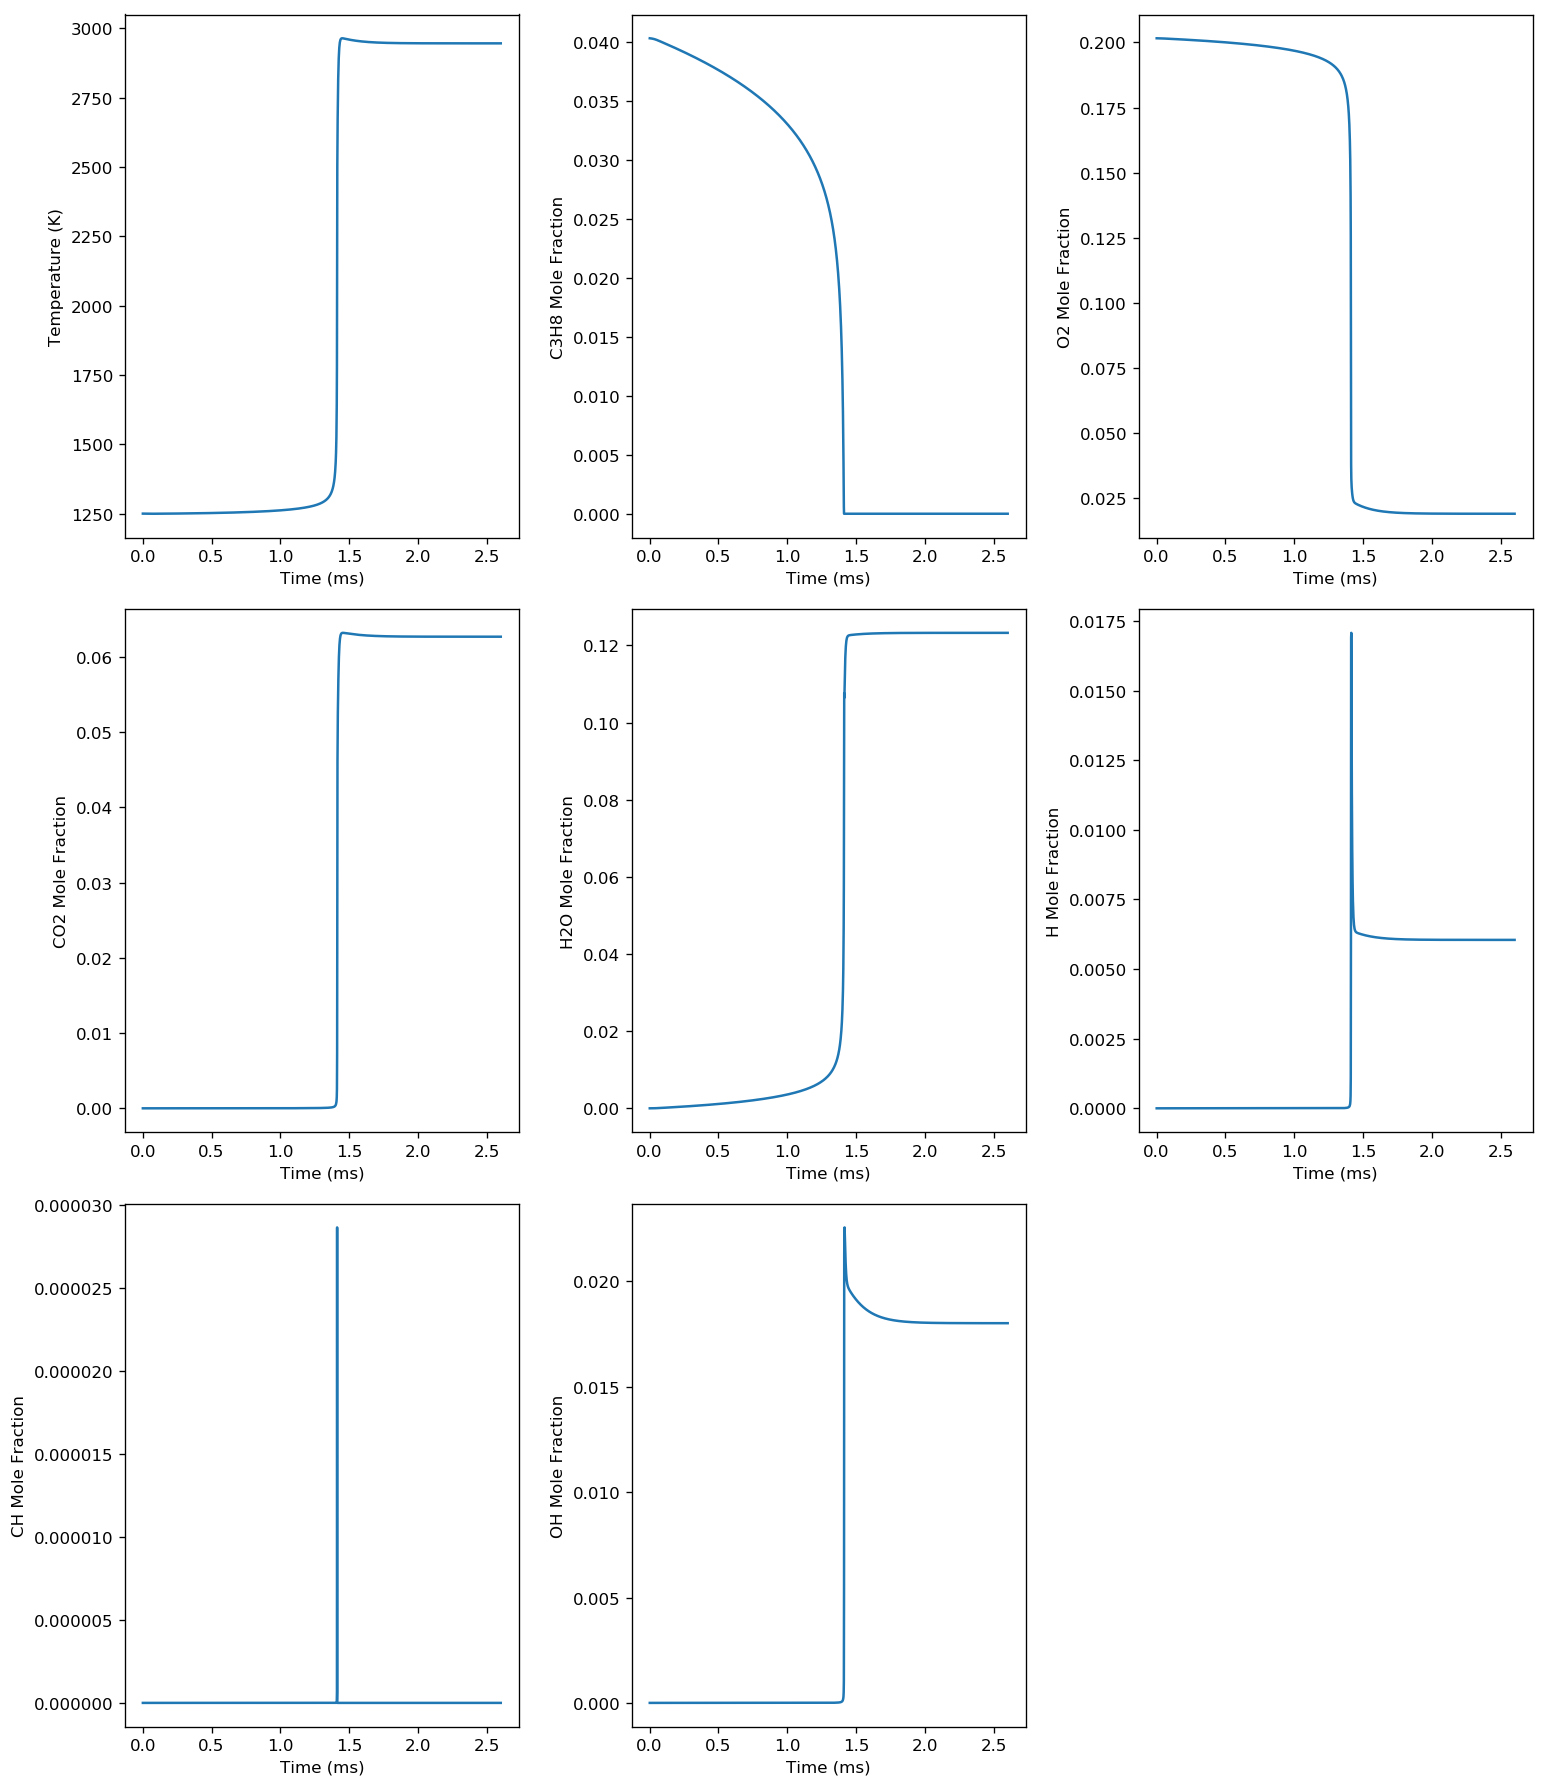

In [5]:
fig=plt.figure(figsize=(13, 15), dpi= 120)
plt.clf()
plt.subplot(331)
plt.plot(times, data[0,:])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(332)
plt.plot(times, data[1,:])
plt.xlabel('Time (ms)')
plt.ylabel('C3H8 Mole Fraction')
plt.subplot(333)
plt.plot(times, data[2,:])
plt.xlabel('Time (ms)')
plt.ylabel('O2 Mole Fraction')
plt.subplot(334)
plt.plot(times,data[3,:])
plt.xlabel('Time (ms)')
plt.ylabel('CO2 Mole Fraction')
plt.subplot(335)
plt.plot(times, data[4,:])
plt.xlabel('Time (ms)')
plt.ylabel('H2O Mole Fraction')
plt.subplot(336)
plt.plot(times, data[5,:])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(337)
plt.plot(times, data[6,:])
plt.xlabel('Time (ms)')
plt.ylabel('CH Mole Fraction')
plt.subplot(338)
plt.plot(times,data[7,:])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.tight_layout()
plt.show()

From the results obtained in the “Adiabatic temperature in reactor” graph above, it can be seen that the system maintains its initial temperature of 1250K till approximately 1.4 ms, after which it increases drastically to a new temperature. In order words this is called the ignition delay time of a combustible mixture. In theory, this phenomenon is very well defined, but it is very difficult to estimate its exact value practically. We will now examine different practical definitions of the ignition delay time in order to get a better understanding of what the ignition delay time. The definitions are:

    T has increased by 10% of T_0
	T has increased by 20% of T_0
	T has increased by 50% of T_0
	T has increased by 100% of T_0
	dT/dt is maximum (the temporal temperature gradient
	Χ_CH reaches its maximum value
	Χ_OH reaches 2000 vppm
The results obtained are summarized below:


In [124]:
n=0
while(data[0,n]<1.1*1250):
    n1 = n
    n+=1

n=0
while(data[0,n]<1.2*1250):
    n2 = n
    n+=1
  
n=0
while(data[0,n]<1.5*1250):
    n3 = n
    n+=1
    
n=0
while(data[0,n]<2.0*1250):
    n4 = n
    n+=1

maxGrad = 0
maxGradTime = 0
maxGradTemp = 0
for n in range(1999):
    grad = (data[0,n+1]-data[0,n])/(times[n+1]-times[n])
    if grad>maxGrad:
        maxGrad = grad
        maxGradTime = times[n]
        maxGradTemp = data[0,n]

When T has increased by 10% of T_0 Time =  1.3923000000000154
When T has increased by 20% of T_0 Time =  1.4053000000000162
When T has increased by 50% of T_0 Time =  1.4105000000000165
When T has increased by 100% of T_0 Time =  1.4118000000000166
Maximum gradient(K/ms), Time(s) , Temp(K): (319562.5830601258, 1.4105000000000165, 1781.543267614893)


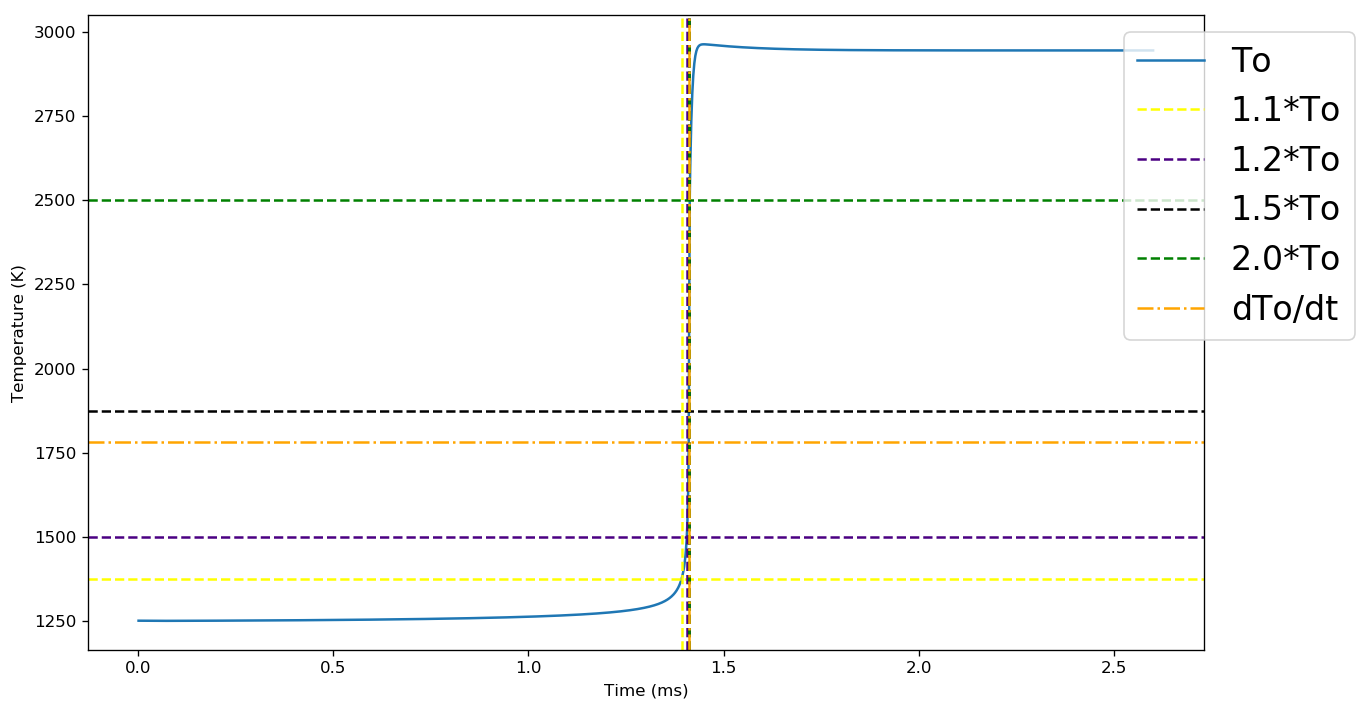

In [125]:
fig=plt.figure(figsize=(12, 7), dpi= 120)
plt.clf()
plt.subplot(111)
plt.plot(times, data[0,:],label ='To')
plt.axhline(1.1*1250,label ='1.1*To', ls='dashed', color='yellow')
plt.axvline(times[n1], ls='dashed', color='yellow')
plt.axhline(1.2*1250,label ='1.2*To', ls='dashed', color='indigo')
plt.axvline(times[n2], ls='dashed', color='indigo')
plt.axhline(1.5*1250,label ='1.5*To', ls='dashed', color='black')
plt.axvline(times[n3], ls='dashed', color='black')
plt.axhline(2.0*1250,label ='2.0*To', ls='dashed', color='green')
plt.axvline(times[n4], ls='dashed', color='green')
plt.axhline(maxGradTemp,label ='dTo/dt', ls='dashdot', color='orange')
plt.axvline(maxGradTime, ls='dashdot', color='orange')
plt.legend(bbox_to_anchor=(1.15, 1),loc=1,fontsize=20)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

print ('When T has increased by 10% of T_0 Time = ', (times[n1]))
print ('When T has increased by 20% of T_0 Time = ', (times[n2]))
print ('When T has increased by 50% of T_0 Time = ', (times[n3]))
print ('When T has increased by 100% of T_0 Time = ', (times[n4]))
print ("Maximum gradient(K/ms), Time(s) , Temp(K):", (maxGrad, maxGradTime, maxGradTemp))

Mole Fraction when CH reaches its maximum value 2.8629180760514392e-05
Time when CH reaches its maximum value (ms) 1.4118000000000166


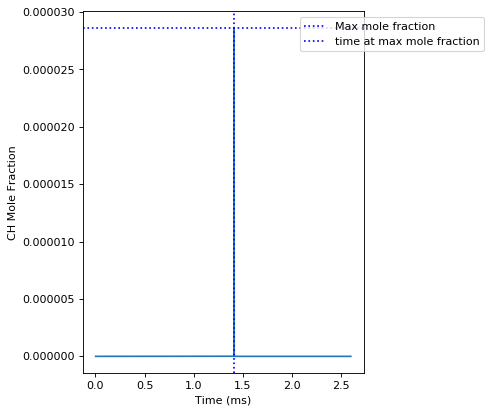

In [126]:

maxfrac = np.argmax(data[6,:])
print ("Mole Fraction when CH reaches its maximum value",(data[6,maxfrac]))
print ("Time when CH reaches its maximum value (ms)",(times[maxfrac]))
fig=plt.figure(figsize=(15, 15), dpi= 80)
plt.clf()
plt.subplot(331)
plt.plot(times, data[6,:])
plt.axhline(data[6,maxfrac], label ='Max mole fraction', ls='dotted', color='blue')
plt.axvline(times[maxfrac], label ='time at max mole fraction', ls='dotted', color='blue')
plt.legend(bbox_to_anchor=(1.45, 1),loc=1,fontsize=10)
plt.xlabel('Time (ms)')
plt.ylabel('CH Mole Fraction')
plt.tight_layout()
plt.show()

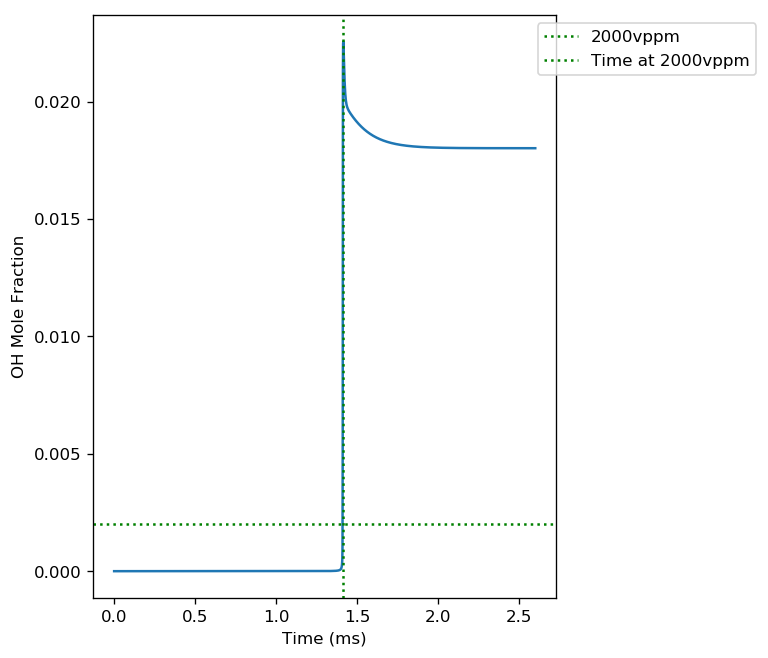

XOH at 2000 vppm 0.002
Time when XOH 2000 vppm (ms) 1.4105000000000165


In [127]:
n=0
while (data[7,n]<0.002):
    n1 = times[n]
    n+=1
fig=plt.figure(figsize=(16, 16), dpi= 120)
plt.clf()
plt.subplot(331)
plt.plot(times, data[7,:])
plt.axhline(0.002, label ='2000vppm', ls='dotted', color='green')
plt.axvline(n1, label ='Time at 2000vppm', ls='dotted', color='green')
plt.legend(bbox_to_anchor=(1.45, 1),loc=1,fontsize=10)
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.tight_layout()
plt.show()
print ("XOH at 2000 vppm",(0.002))
print ("Time when XOH 2000 vppm (ms)",(n1))


From the results obtained, we can conclude that all of the definitions roughly converge at approximately the same time value. The most accurate measure is however when dT/dt is at maximum (at 0.0923 ms) as this is when the ignition actually happens where the temperature rises abruptly with the most amount of energy released. This definition is however very difficult to estimate in real or practical scenarios as we would need information regarding the rate of temperature change. 

### 1.3 Subsection 1: Effect on Ignition Time with varying Initial Temperature

As the ignition delay time is well defined, we will look at the effect of changing the initial temperature of the system on the ignition delay time of a stoichiometric ethane-air mixture, keeping initial pressure constant at 5 atm. The temperature will be varied from 1000K to 1500K in steps of 25K, and the results obtained will be plotted on a semi-log chart which will have a logarithmic ignition time on the y-axis and 1/T${}_{0}$ on the x-axis. As per adiabatic explosion theory, T${}_{0}$ and t${}_{c}$ will be related in the following way:

$$t_c\propto exp\left(\frac{T_a}{T_0}\right)$$




In [128]:
gri3 = ct.Solution('gri30.cti')

temp = np.linspace(1000, 1500, 21)
times = np.zeros(1000000)
data = np.zeros(1000000)


maxGrads=np.zeros(temp.shape)
maxGradTimes=np.zeros(temp.shape)



for i in range(len(temp)):
    time = 0.0
    gri3.TPX = temp[i], 5*ct.one_atm, 'C3H8:1,O2:5,N2:18.8' 
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    for n in range(1000000):
        time += 10e-6
        sim.advance(time)
        times[n] = time # time in s
        data[n] = r.T

    for j in range(99999):
        grad = abs((data[j+1]-data[j])/(times[j+1]-times[j]))
        if grad>maxGrads[i]:
            maxGrads[i] =grad
            maxGradTimes[i]=times[j]

Gradient for 5 MPa pressure: 22.041991230698255


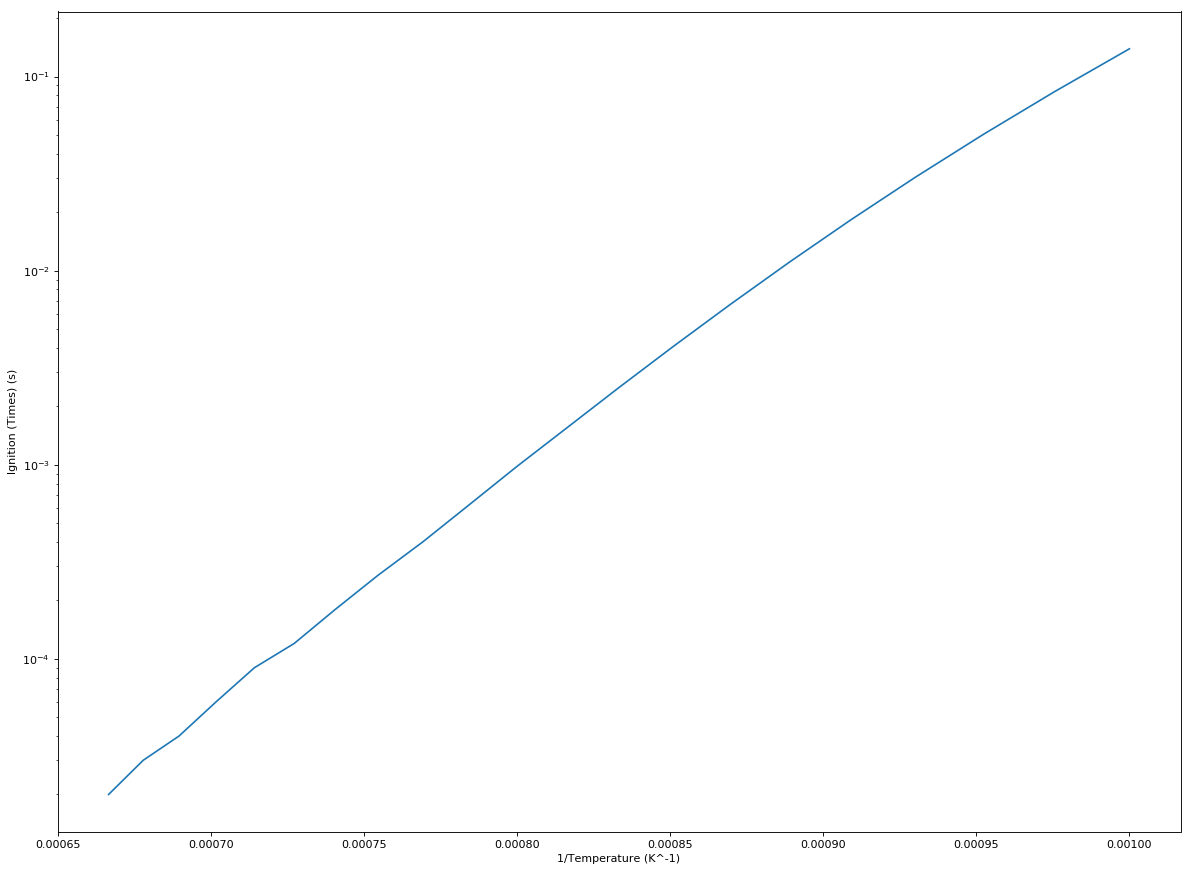

In [129]:
fig=plt.figure(figsize=(15, 11), dpi= 80)
plt.clf()
plt.subplot(111)
plt.plot(1/temp[:], maxGradTimes[:])
plt.yscale('log')
plt.xlabel('1/Temperature (K^-1)')
plt.ylabel('lgnition (Times) (s)')
slope, intercept = np.polyfit(np.log(1/temp), np.log(maxGradTimes), 1)
print('Gradient for 5 MPa pressure:',(slope))
plt.tight_layout()
plt.show()

It can be observed that a decrease in initial temperature (increase in 1/T${}_{0}$) results in an increase in the ignition delay time, which matches to the equations 1 and 2 in the assignment handout and were derived earlier in the report. This behavior is proved with the fact that, an increase in initial temperature would result in the molecules of the combustible mixture having a higher energy and will therefore be more likely to have the necessary amount of activation energy required for ignition.

### 1.3 Subsection 2: Effect on Ignition Time with varying Initial Pressures

In order to further study the effect of operating conditions on the ignition time delay, the effect of increasing initial pressure of the system on the ignition delay time will be observed. The system will be run at pressure values of 10, 15 and 20 atm while keeping all other operating conditions same as the previous run. All the three pressure cases results will be superimposed for better analysis. As can be seen from the results obtained below, an increase in initial pressure results in a decrease in the ignition delay time. This phenomenon makes sense as when system pressure is increased, the molecules have a greater force acting on them, and thus increasing their average kinetic energy and frequency of collisions, hence will be more likely to have the necessary amount of activation energy required for ignition.

In [130]:
gri3 = ct.Solution('gri30.cti')

time = 0.0
temp = np.linspace(1000, 1500, 21)
times = np.zeros(1000000)
data = np.zeros(1000000)
press = np.linspace(0, 2, 3)

maxGrads=np.zeros((21,3))
maxGradTimes=np.zeros((21,3))


for k in range(len(press)):
    m=np.power(2,k+1)*5
   
    for i in range(len(temp)):
        time = 0.0
        gri3.TPX = temp[i], m*ct.one_atm, 'C3H8:1,O2:5,N2:18.8' 
        r = ct.IdealGasReactor(gri3)
        sim = ct.ReactorNet([r])
        for n in range(1000000):
            time += 10e-6
            sim.advance(time)
            times[n] = time # time in s
            data[n] = r.T

        for j in range(99999):
            grad = abs((data[j+1]-data[j])/(times[j+1]-times[j]))
            if grad>maxGrads[i,k]:
                maxGrads[i,k] =grad
                maxGradTimes[i,k]=times[j]



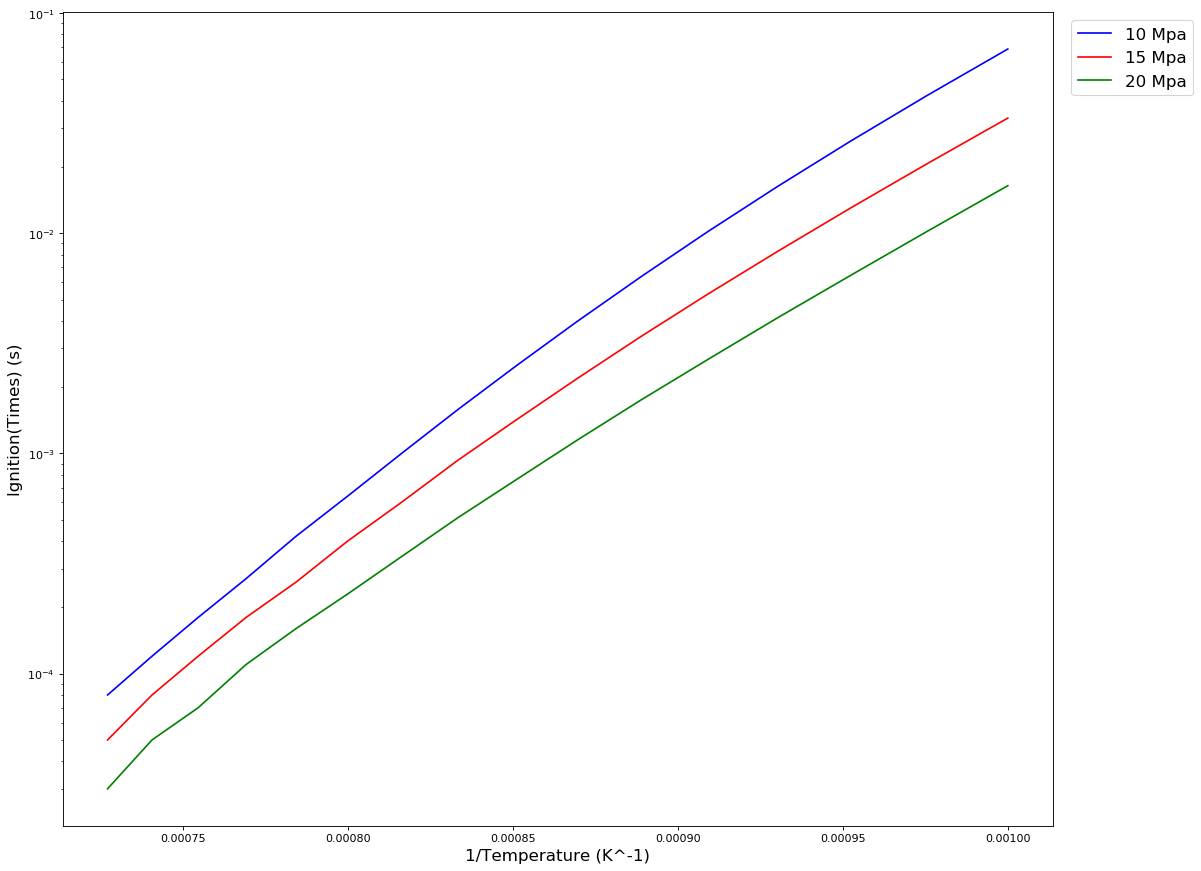

In [131]:
#Plotting
fig=plt.figure(figsize=(15, 11), dpi= 80)
plt.clf()
plt.subplot(111)
plt.plot(1/temp[:16],maxGradTimes[:16,0],label ='10 Mpa', color='Blue',)
plt.plot(1/temp[:16],maxGradTimes[:16,1],label ='15 Mpa', color='Red')
plt.plot(1/temp[:16],maxGradTimes[:16,2],label ='20 Mpa', color='Green')
plt.legend(bbox_to_anchor=(1.15, 1),loc=1,fontsize=15)
plt.yscale('log')
plt.xlabel('1/Temperature (K^-1)',fontsize=15)
plt.ylabel('lgnition(Times) (s)',fontsize=15)
plt.tight_layout()
plt.show()

### 1.4: Effect on Activation Energy with varying Initial Temperature and Pressure

In this section, we will be using the semi-log charts plotted in the previous section to calculate the Activation Energy for each case. By fitting a linear regression to the charts and setting the axes in the form of y = mx + c, we can calculate the slope of each curve. The following relationship will be used:

$$t_c\propto exp\left(\frac{E_A}{R_uT_0}\right)$$
$$t_c=Aexp\left(\frac{E_A}{R_uT_0}\right)\Longleftrightarrow y=Aexp(Bx) $$

Taking natural logarithm on both sides results in:

$${\mathrm{log} \left(t_c\right)\ }={\mathrm{log} \left(A\right)\ }+\frac{E_A}{R_u}\frac{1}{1000\times T_0}\Longleftrightarrow y=c+mx$$

It can now be concluded that the gradient of the fitted linear regression graph is equal to.
$${E_A}/{1000R_u}$$
Using the polyfit command of python, we will fit a linear regression on all the charts and note down the gradients respectively. The inputs for this command are the initial temperature, logarithmic ignition delay time and ''1'' which indicates a linear line. The resulting outputs of this command will be the gradient of the chart and its y-intercept. The activation energy is calculated by multiplying the gradient with the universal gas constant. The results obtained are summarized below:

$$m=\frac{E_A}{{1000\times R}_u}\Longrightarrow E_A=m{\times 1000\times R}_u$$

Gradients for 10, 15, 20 Mpa pressures [21.385325   20.33612326 19.53853691]


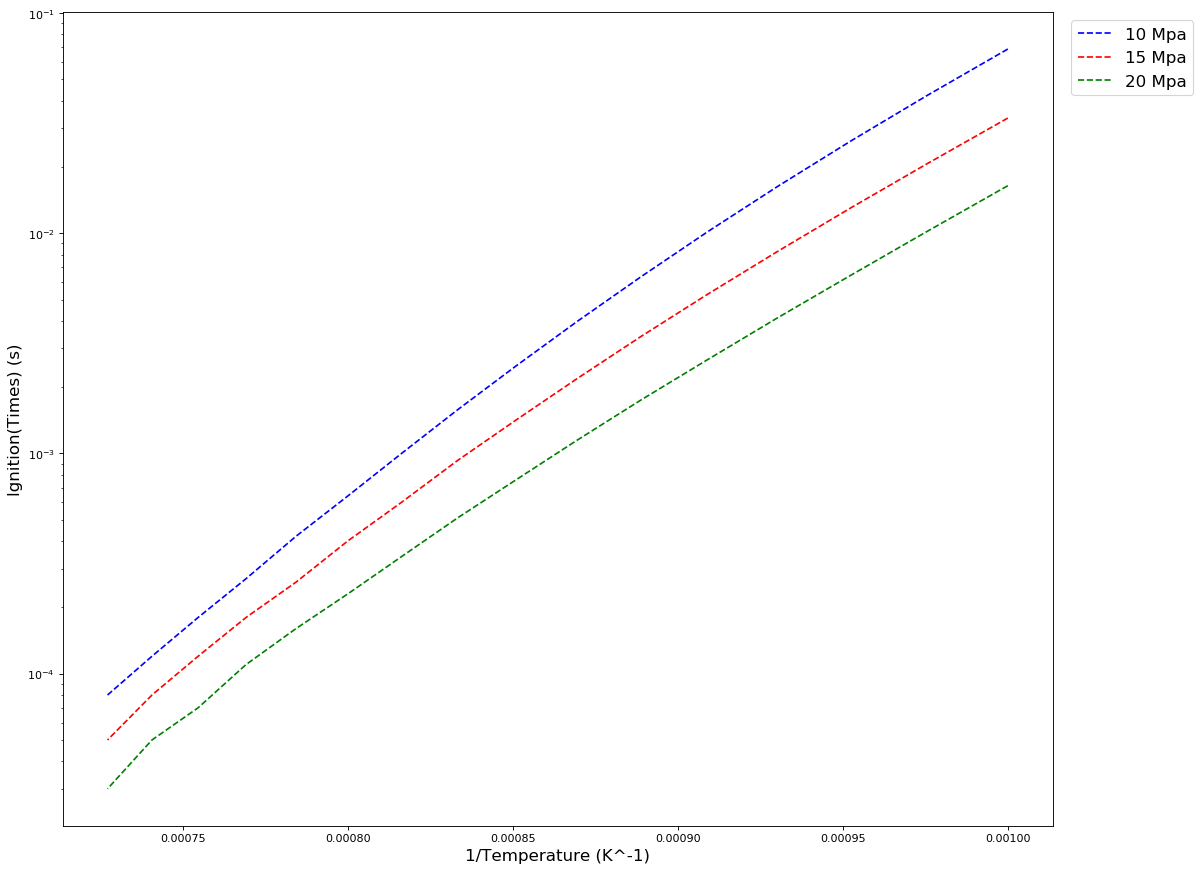

In [132]:
#Plotting
fig=plt.figure(figsize=(15, 11), dpi= 80)
plt.clf()
plt.subplot(111)
plt.plot(1/temp[:16],maxGradTimes[:16,0], ls='dashed', label ='10 Mpa', color='blue',)
plt.plot(1/temp[:16],maxGradTimes[:16,1], ls='dashed',label ='15 Mpa', color='red')
plt.plot(1/temp[:16],maxGradTimes[:16,2], ls='dashed',label ='20 Mpa', color='green')
plt.legend(bbox_to_anchor=(1.15, 1),loc=1,fontsize=15)
plt.yscale('log')
plt.xlabel('1/Temperature (K^-1)',fontsize=15)
plt.ylabel('lgnition(Times) (s)',fontsize=15)
slope, intercept = np.polyfit(np.log(1/temp), np.log(maxGradTimes), 1)
print('Gradients for 10, 15, 20 Mpa pressures',(slope))
plt.tight_layout()
plt.show()

As we know 
$$m=\frac{E_A}{{1000\times R}_u}\Longrightarrow E_A=m{\times 1000\times R}_u$$
So for pressures 5, 10 and 15 the ${E_A}$ is calculated using the gradients.

$Pressure= 5Mpa , Gradient=22.041991230698255 , E_A=22.042{\times 1000\times 8.314}=183257.1kJ/kmolK$

$Pressure= 10Mpa , Gradient=21.385325 , E_A=21.386{\times 1000\times 8.314}=177803.2kJ/kmolK$

$Pressure= 15Mpa , Gradient=20.33612326 , E_A=20.336{\times 1000\times 8.314}=169073.5kJ/kmolK$

$Pressure= 20Mpa , Gradient=19.53853691 , E_A=19.539{\times 1000\times 8.314}=162447.2kJ/kmolK$



As we can see from the results obtained, the difference in activation energy as the pressure changes is approximately 20800.00 kJ/kmolK, which is small compared to the actual value of the activation energy, thus it does not depend on pressure. This behavior can be explained using the fact that an increase in pressure will result in an increase in the amount of force acting on the particle raising its average kinetic energy and increasing the frequency of overall number of collisions of the system. This however will not affect the amount of energy required for the particles to cause a reaction; i.e. Activation Energy, hence it is independent of pressure changes



### 1.5: Effect on Ignition Time with varying Initial Temperature and Equivalence Ratio

Part 1 concludes with the analysis of the effect of varying the equivalence ratio on ignition time delay while temperature is varied. The temperature will be varied from 1200K to 1600K in steps of 25K, and the results obtained will be plotted on a semi-log chart which will have a logarithmic ignition time on the y-axis and 1/T0 on the x-axis. The equivalence ratio will be varied to 0.6 and 1.2 respectively while keeping initial pressure constant at 10 atm.  Seen below are the results obtained:

In [6]:
gri3 = ct.Solution('gri30.cti')
#for phi 0.6
tempx = np.linspace(1200, 1600, 17)
timesx = np.zeros(1000000)
datax = np.zeros(1000000)


maxGradsx=np.zeros(tempx.shape)
maxGradTimesx=np.zeros(tempx.shape)

for i in range(len(tempx)):
    timex = 0.0
    gri3.TPX = tempx[i], 10*ct.one_atm, 'C3H8:0.6,O2:5,N2:18.8'
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    for n in range(1000000):
        timex += 10e-7
        sim.advance(timex)
        timesx[n] = timex # time in s
        datax[n] = r.T

    for j in range(99999):
        gradx = abs((datax[j+1]-datax[j])/(timesx[j+1]-timesx[j]))
        if gradx>maxGradsx[i]:
            maxGradsx[i] =gradx
            maxGradTimesx[i]=timesx[j]
            
#for phi 1.2
tempy = np.linspace(1200, 1600, 17)
timesy = np.zeros(1000000)
datay = np.zeros(1000000)


maxGradsy=np.zeros(tempy.shape)
maxGradTimesy=np.zeros(tempy.shape)

for i in range(len(tempx)):
    timex = 0.0
    gri3.TPX = tempx[i], 10*ct.one_atm, 'C3H8:1,O2:5,N2:18.8'
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    for n in range(1000000):
        timex += 10e-7
        sim.advance(timex)
        timesx[n] = timex # time in s
        datax[n] = r.T

    for j in range(99999):
        gradx = abs((datax[j+1]-datax[j])/(timesx[j+1]-timesx[j]))
        if gradx>maxGradsx[i]:
            maxGradsx[i] =gradx
            maxGradTimesx[i]=timesx[j]
            
#for phi 1.2
tempy = np.linspace(1200, 1600, 17)
timesy = np.zeros(1000000)
datay = np.zeros(1000000)


maxGradsy=np.zeros(tempy.shape)
maxGradTimesy=np.zeros(tempy.shape)


for i in range(len(tempy)):
    timey = 0.0
    gri3.TPX = tempy[i], 10*ct.one_atm, 'C3H8:1.2,O2:5,N2:18.8'
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    for n in range(1000000):
        timey += 10e-6
        sim.advance(timey)
        timesy[n] = timey # time in s
        datay[n] = r.T

    for j in range(99999):
        grady = abs((datay[j+1]-datay[j])/(timesy[j+1]-timesy[j]))
        if grady>maxGradsy[i]:
            maxGradsy[i] =grady
            maxGradTimesy[i]=timesy[j]


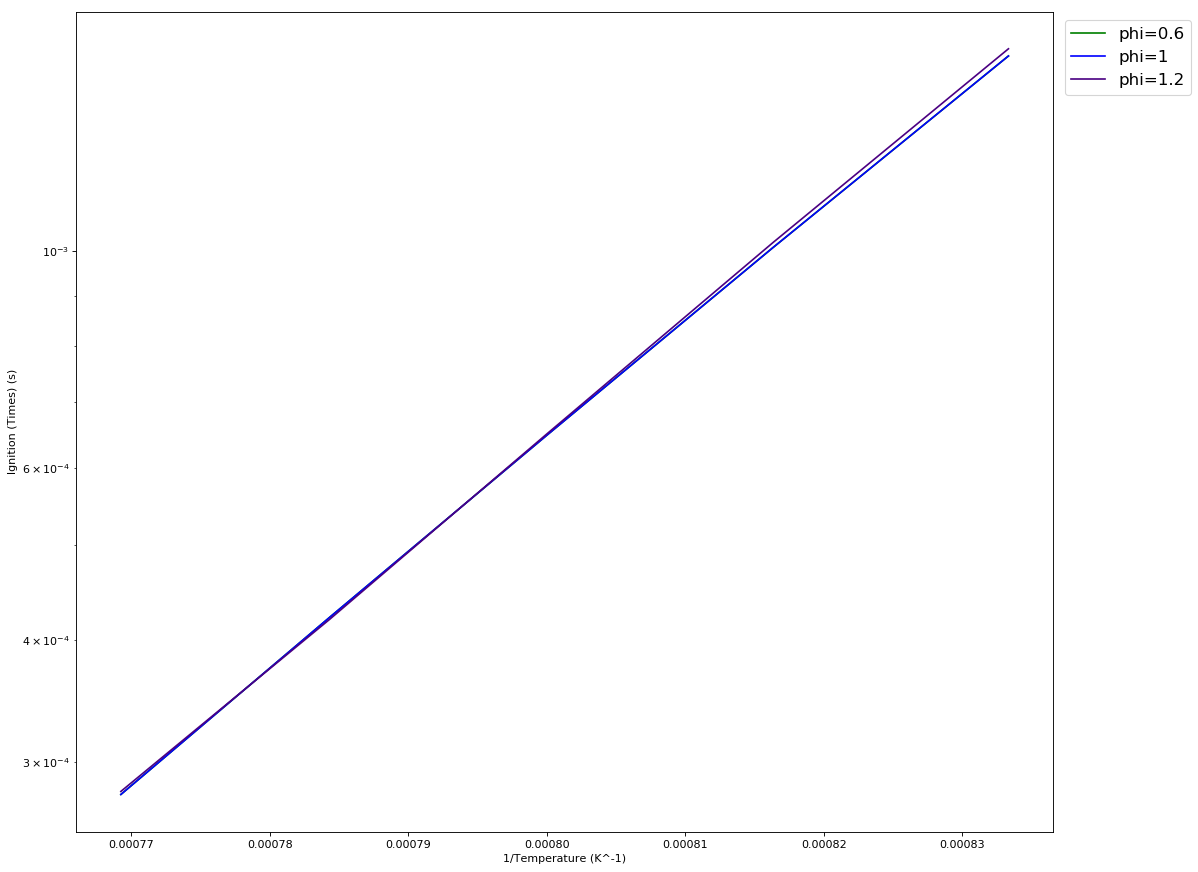

In [8]:
fig=plt.figure(figsize=(15, 11), dpi= 80)
plt.clf()
plt.subplot(111)
plt.plot(1/tempx[:5], maxGradTimesx[:5], label ='phi=0.6', color='green',)
plt.plot(1/tempx[:5], maxGradTimesx[:5], label ='phi=1', color='blue',)
plt.plot(1/tempy[:5], maxGradTimesy[:5], label ='phi=1.2', color='indigo',)
plt.legend(bbox_to_anchor=(1.15, 1),loc=1,fontsize=15)
plt.yscale('log')
plt.xlabel('1/Temperature (K^-1)')
plt.ylabel('lgnition (Times) (s)')
plt.tight_layout()
plt.show()

An initial glance at the results obtained shows a very small change in ignition delay plots as 𝜙 increases, thus indicating a small dependence. On further inspection, it can be seen that the ignition delay time increases by a small amount when 𝜙 increases. Usually, we would expect the ignition delay time to be lower for stoichiometric or richer fuels than for fuel lean case. This is however not in the case of Propane-Air combustion as it is an exception. The concentration of oxidizer (oxygen) is much higher than that of fuel. The reaction rate will increase when the concentration of oxygen is increased and will decrease when the concentration of ethane is increased. This behavior will then effect the ignition delay time of the system as in the opposite way as t_c∝1⁄k, where k is the reaction rate of the system. This phenomenon can be mainly explained due to a termination reaction of a very reactive radical (H) with the fuel changing it to a stable species.

## 1.6: Bonus Question

## Theory 

In this bonus question we examine the changes in the value of ignition temperature when we change the values of initial temperatures, we are also asked to examine the behaviour of the activation energy $E_a$ using the graph we obtain. To plot the graph we make sure to run a loop as in the previous cases until we reach a value of where the temperature difference for an iteration is highest. We then do this for all the $T_0$'s and plot them on the graph for each initial pressure. 

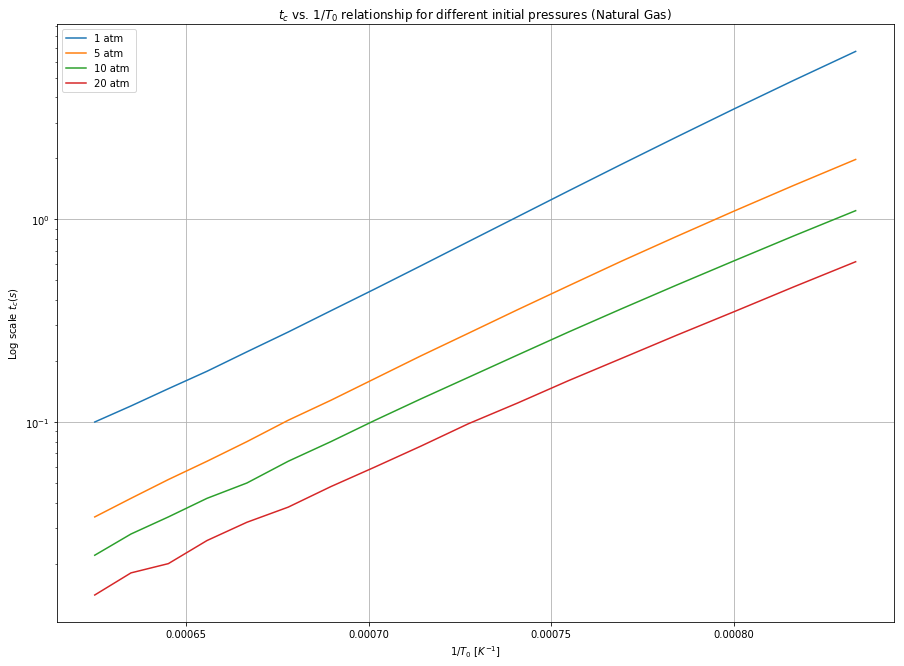

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct
gri3 = ct.Solution('gri30.cti')   

times = np.zeros(10000)  
data = np.zeros((10000,2))   
T_sampling= np.linspace(1200,1600,17)  
t_c = np.zeros(len(T_sampling)) 
m =16
for i in range(len(T_sampling)):
    gri3.TPX = T_sampling[i], 1*ct.one_atm, 'CH4:0.91, C2H6:0.07, C3H8:0.02, O2:2.14, N2:8.027'  
    r = ct.IdealGasReactor(gri3) 
    sim = ct.ReactorNet([r])  
    time = 0.0 
    for n in range(10000):
        time += 2e-6 
        sim.advance(time)  
        times[n] = time * 1e3  
        data[n,0] = r.T  
        x = data[n,0]
        if(n>m):         
            z = data[n-2,0]
            if(x-y) < (y-z):
                break
        y = x
    t_c[i] = times[n-1]     
    m=m+1

times = np.zeros(10000000)  
data = np.zeros((10000000,2)) 
T_sampling= np.linspace(1200,1600,17)
t_c1 = np.zeros(len(T_sampling))
m =16
for i in range(len(T_sampling)):
    gri3.TPX = T_sampling[i], 5*ct.one_atm, 'CH4:0.91, C2H6:0.07, C3H8:0.02, O2:2.14, N2:8.027'
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    time = 0.0
    for n in range(10000000):
        time += 2e-6
        sim.advance(time)
        times[n] = time * 1e3
        data[n,0] = r.T
        x = data[n,0]
        if(n>1):
            z = data[n-2,0]
            if(x-y) < (y-z):
                break
        y = x
    t_c1[i] = times[n-1]
    m=m+1

times = np.zeros(10000000)          
data = np.zeros((10000000,2)) 
T_sampling= np.linspace(1200,1600,17)
t_c2 = np.zeros(len(T_sampling))
m =16
for i in range(len(T_sampling)):
    gri3.TPX = T_sampling[i], 10*ct.one_atm, 'CH4:0.91, C2H6:0.07, C3H8:0.02, O2:2.134, N2:8.027'
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    time = 0.0
    for n in range(10000000):
        time += 2e-6
        sim.advance(time)
        times[n] = time * 1e3
        data[n,0] = r.T
        x = data[n,0]
        if(n>1):
            z = data[n-2,0]
            if(x-y) < (y-z):
                break
        y = x
    t_c2[i] = times[n-1]
    m=m+1

times = np.zeros(10000000)                 
data = np.zeros((10000000,2)) 
T_sampling= np.linspace(1200,1600,17)
t_c3 = np.zeros(len(T_sampling))
m =16
for i in range(len(T_sampling)):
    gri3.TPX = T_sampling[i], 20*ct.one_atm, 'CH4:0.91, C2H6:0.07, C3H8:0.02, O2:2.134, N2:8.027'
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    time = 0.0
    for n in range(10000000):
        time += 2e-6
        sim.advance(time)
        times[n] = time * 1e3
        data[n,0] = r.T
        x = data[n,0]
        if(n>1):
            z = data[n-2,0]
            if(x-y) < (y-z):
                break
        y = x
    t_c3[i] = times[n-1]
    m=m+1


fig, axes = plt.subplots(1, 1, figsize=(15, 11)) 
axes.plot(1/T_sampling, t_c, '-', label="1 atm")
axes.plot(1/T_sampling, t_c1, '-', label="5 atm")
axes.plot(1/T_sampling, t_c2, '-', label="10 atm ")
axes.plot(1/T_sampling, t_c3, '-', label="20 atm")
axes.grid(True)
axes.set_yscale("log")  
axes.legend(loc=2); 
axes.set_xlabel('$1/$$T_0$ [$K^{-1}$]')
axes.set_ylabel('Log scale $t_c (s)$')
axes.set_title('$t_c$ vs. $1/T_0$ relationship for different initial pressures (Natural Gas)');

## Conclusion
The plotted curves show a wider diiference betwwen pressure curves for natural gas in comparsion to propane. This wide difference is due to the chemical properties of the species. Its unclear by looking at the equation which term dominates but it is due to a net overall increase in right hand side of the following equation which leads to bigger gaps. Besides this the curve closely resembles Eq. 1 and Eq. 2.

## Part 2 - Fuel Consumption and Pollutants Generation in Constant UV reactor

The next part involves the study of methane-air mixture at an initial pressure of 15 atm and an initial temperature of 1450 K in a constant volume and internal energy (UV) reactor. We are asked to investigate the consumption of ethane and oxygen and the generation of NOx (NO and NO2) and CO species. Analysis will be made to see how long does the concentration of each species take to reach its steady state condition, comparing that with the ignition time. The steady state of the system is a situation in which the state variables, namely concentration of the species in this case, are constant even though there may be ongoing processes within the system.

In [136]:
gri3 = ct.Solution('gri30.cti')
gri3.TPX = 1450.0, 15*ct.one_atm, 'CH4:1,O2:2,N2:7.52' 

r = ct.IdealGasReactor(gri3)
sim = ct.ReactorNet([r])
time = 0.0
times = np.zeros(1000)
data = np.zeros((1000,8))

for n in range(1000):
    time +=3.5e-6
    sim.advance(time)
    times[n] = time * 1e3  # time in ms
    data[n,0] = r.T
    data[n,1:] = r.thermo['CH4','O2','CO2','H2O','H','CH','OH'].X

maxGrad=0
MoleTime=0
MoleTemp=0

for n in range(999):
    grad = (data[n+1,0]-data[n,0])/(times[n+1]-times[n])
    if grad>maxGrad:
        maxGrad=grad
        MoleTime=times[n]
        MoleTemp=data[n,0]
  
print ('time ignition (ms) and Temperature at Tc (K):',MoleTime,MoleTemp)

time ignition (ms) and Temperature at Tc (K): 0.1925000000000001 2036.614826319001


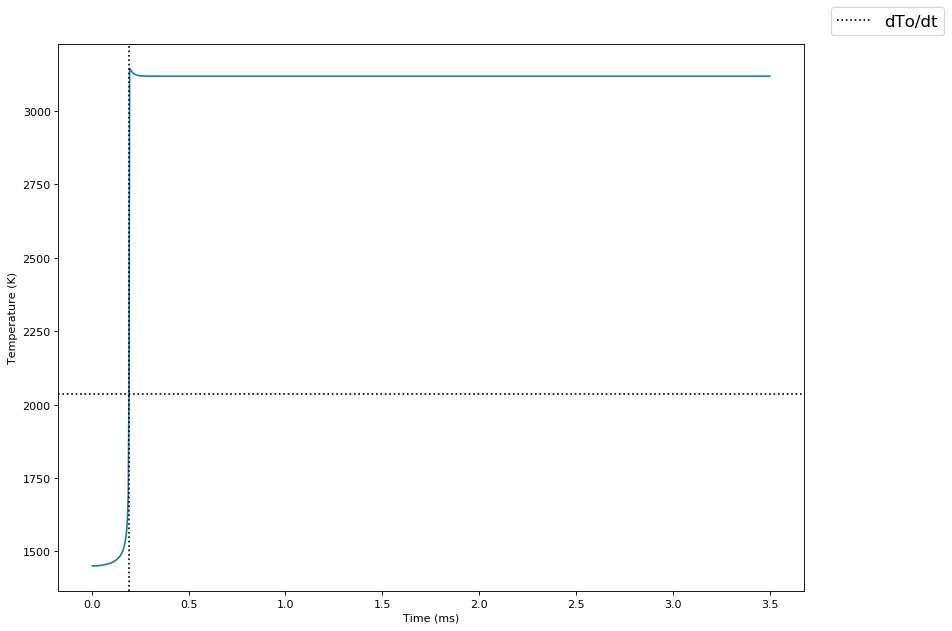

In [137]:
#Plotting the results
fig=plt.figure(figsize=(12, 8), dpi= 80)
plt.clf()
plt.subplot(111)
plt.plot(times, data[:,0])
plt.axhline(MoleTemp,label ='dTo/dt', ls='dotted', color='black')
plt.axvline(MoleTime, ls='dotted', color='black')
plt.legend(bbox_to_anchor=(1.20, 1),loc=4,fontsize=15)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.tight_layout()
plt.show()

The mole fractions of CH4, O2, NOx (NO and NO2) and CO are plotted below with respect to time at the given initial conditions.

In [138]:
gri3 = ct.Solution('gri30.cti')
gri3.TPX = 1450.0, 15*ct.one_atm, 'CH4:1.0,O2:2,N2:7.52'
r = ct.IdealGasConstPressureReactor(gri3)

sim = ct.ReactorNet([r])
time = 0.0
times = np.zeros(1000)
data = np.zeros((1000,6))

minGrads=np.zeros(6)
minGradTimes=np.zeros(6)

for n in range(1000):
    time += 3.0e-6
    sim.advance(time)
    times[n] = time * 1e3  # time in ms
    data[n,0] = r.T
    data[n,1:] = r.thermo['CH4','NO','NO2','CO','O2'].X
    data[n,2] = data[n,2] + data[n,3]
    
for j in range(998,200,-1):
    for k in range(6):
        grad = abs((data[j+1,k]-data[j,k])/(times[j+1]-times[j]))
        if grad<0.001:
            minGrads[k] = grad
            minGradTimes[k] = times[j]

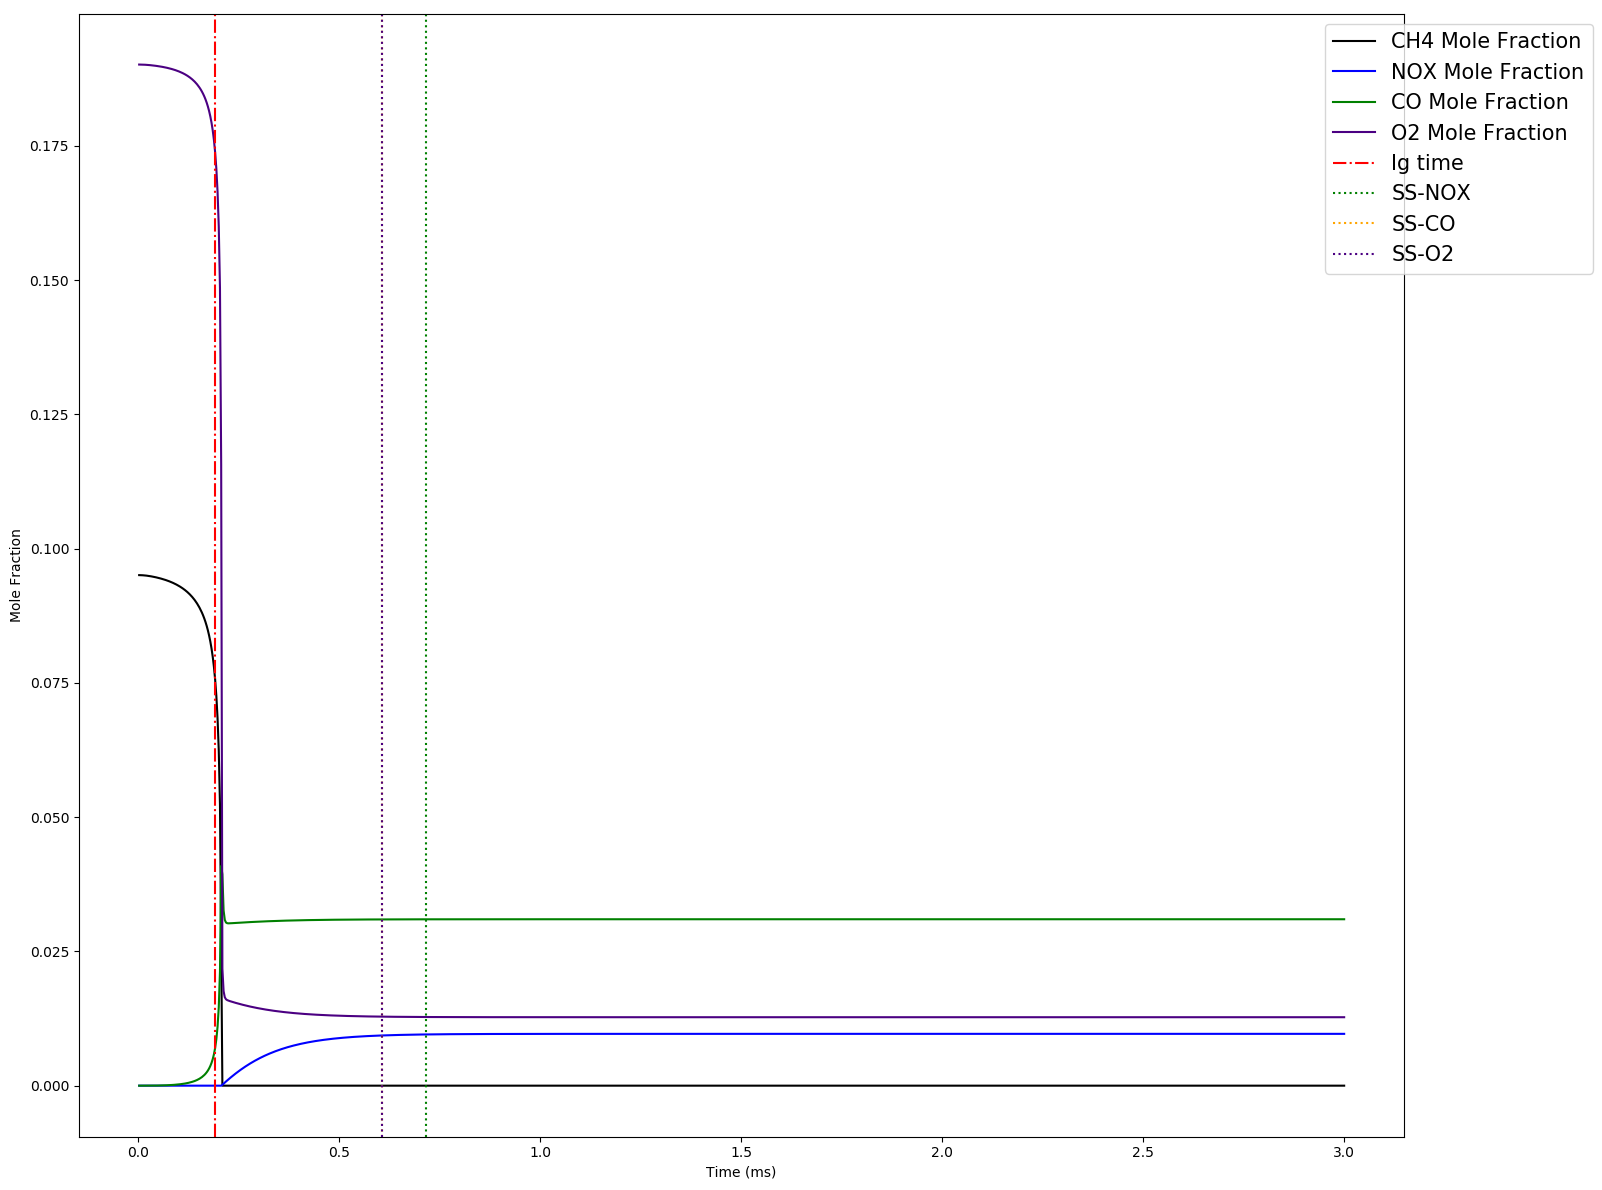

t ignition (ms): 0.1925000000000001
t steady state CO (ms): 0.6059999999999999
t steady state O2 (ms): 0.6059999999999999
t steady state NOX (ms): 0.7169999999999985


In [139]:
fig=plt.figure(figsize=(16, 12), dpi= 100)
plt.clf()
plt.subplot(111)
plt.plot(times, data[:,1],label ='CH4 Mole Fraction', color='black')
plt.plot(times, data[:,2],label ='NOX Mole Fraction', color='blue')
plt.plot(times, data[:,4],label ='CO Mole Fraction', color='green')
plt.plot(times, data[:,5],label ='O2 Mole Fraction', color='indigo')
plt.axvline(MoleTime,label ='Ig time', ls='dashdot', color='red')
plt.axvline(minGradTimes[2],label ='SS-NOX', ls='dotted', color='green')
plt.axvline(minGradTimes[4],label ='SS-CO', ls='dotted', color='orange')
plt.axvline(minGradTimes[5],label ='SS-O2', ls='dotted', color='indigo')
plt.legend(bbox_to_anchor=(1.15, 1),loc=1,fontsize=15)
plt.ylabel('Mole Fraction')
plt.xlabel('Time (ms)')
plt.tight_layout()
plt.show()

print ('t ignition (ms):', (MoleTime))
print ('t steady state CO (ms):', (minGradTimes[4]))
print ('t steady state O2 (ms):', (minGradTimes[5]))
print ('t steady state NOX (ms):', (minGradTimes[2]))



The mole fractions of CH${}_{4}$, O${}_{2}$, NO${}_{x}$${}_{ }$(NO and NO${}_{2}$) and CO are plotted below with respect to temperature at the given initial conditions, also showing the exactly when each species reaches its steady state condition:

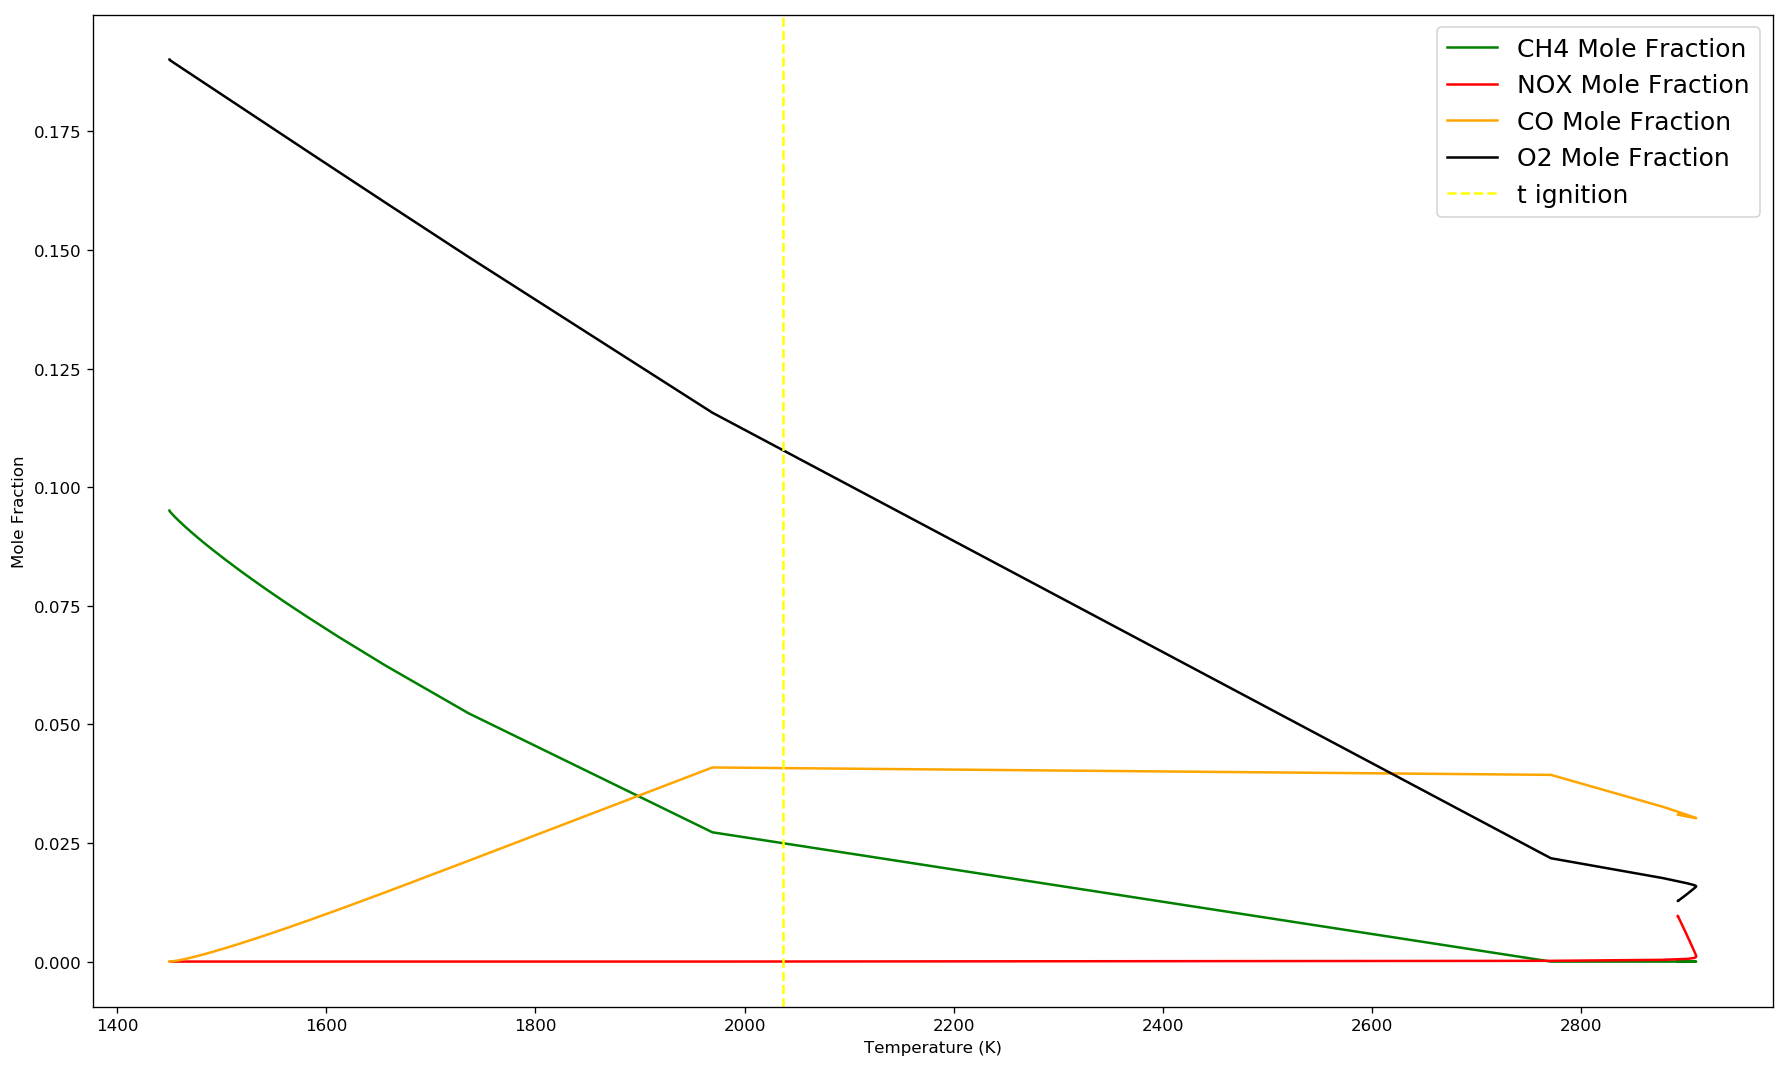

In [140]:
fig=plt.figure(figsize=(15, 9), dpi= 120)
plt.clf()
plt.subplot(111)
plt.plot(data[:,0], data[:,1],label ='CH4 Mole Fraction', color='green')
plt.plot(data[:,0], data[:,2]+data[:,3],label ='NOX Mole Fraction', color='red')
plt.plot(data[:,0], data[:,4],label ='CO Mole Fraction', color='orange')
plt.plot(data[:,0], data[:,5],label ='O2 Mole Fraction', color='black')
plt.axvline(MoleTemp, label ='t ignition', ls='dashed', color='yellow')
plt.legend(bbox_to_anchor=(1, 1),loc=1,fontsize=15)
plt.ylabel('Mole Fraction')
plt.xlabel('Temperature (K)')
plt.tight_layout()
plt.show()

Now that we have the results, we are asked to compare the steady state of each species with the ignition time of the system. 

t-ignition (ms): 0.1925000000000001

t steady state CO(ms): 0.6059999999999999 Time difference(ms)= 0.414

t steady state O2 (ms): 0.6059999999999999 Time difference(ms)= 0.414

t steady state NOX (ms): 0.7169999999999985 Time difference(ms)= 0.528

The data above shows us that the ignition time is approximately also the time when methane reaches its steady state. The steady state of CO generation is slightly afterwards, with steady state of oxygen being next and steady state of NOx  being the last one. This can be explained using the fact that methane is completely used almost instantaneously, changing into other species and/or radicals at the ignition time. There is a time delay in the case of oxygen as there may be other ongoing reactions as all of the oxygen does not necessarily react with the methane instantaneously. CO gets generated slightly before oxygen as it reacts with oxygen radicals to form CO. As it can be seen, the concentration of oxygen is in excess as all of it is not used up, so there are reactions ongoing while methane and CO reach their steady state conditions. The formation of NOx has the highest time delay as the bond between N-N requires much higher energy and higher temperatures to break in order to form N-O compounds. 

## 2.1: Bonus Question

## Theory 

N0 and N02 were seperately analyzed. The objective of this question is to be able to infer that the the timescales of $NO$ and $NO2$ are much higher than the rest and this makes sense since the time taken to break the triple bond is much longer than any of the other bonds. Similarly $O_2$ takes a longer time than $CH_4$ to cleave since it has double bonds as compared to the single bonds in $CH_4$. For $C_3H_8$ and $C_2H_6$ the behaviour is similar to that of methane and they cleave at a reasonably quick rate as well.  

<Figure size 432x288 with 0 Axes>

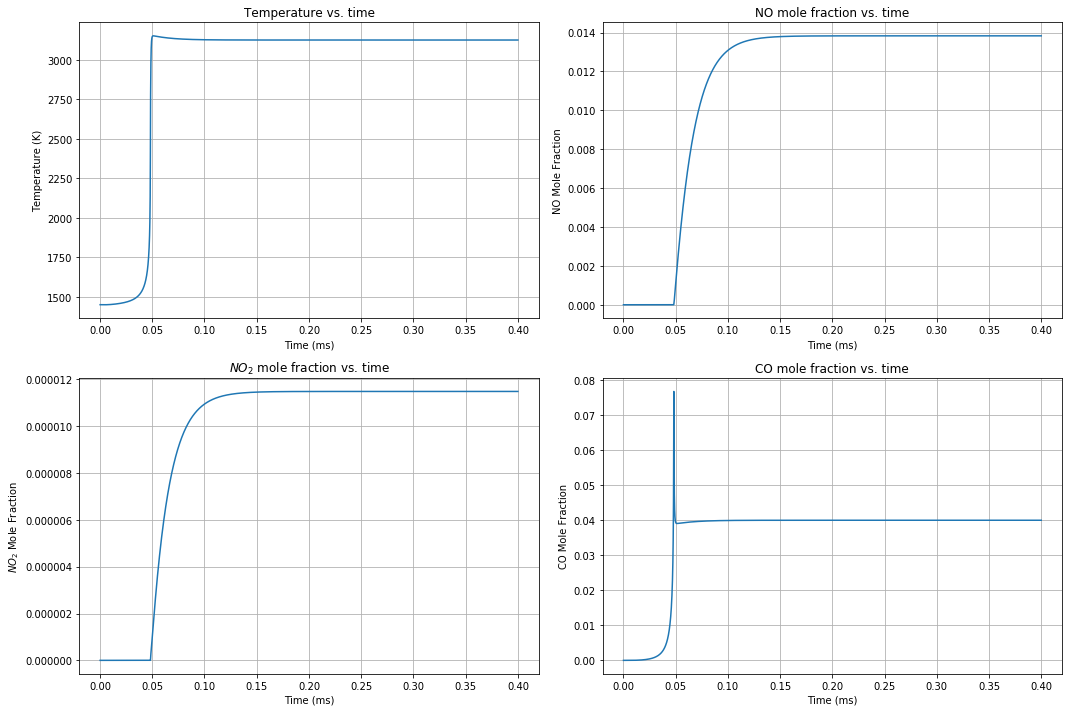

<Figure size 432x288 with 0 Axes>

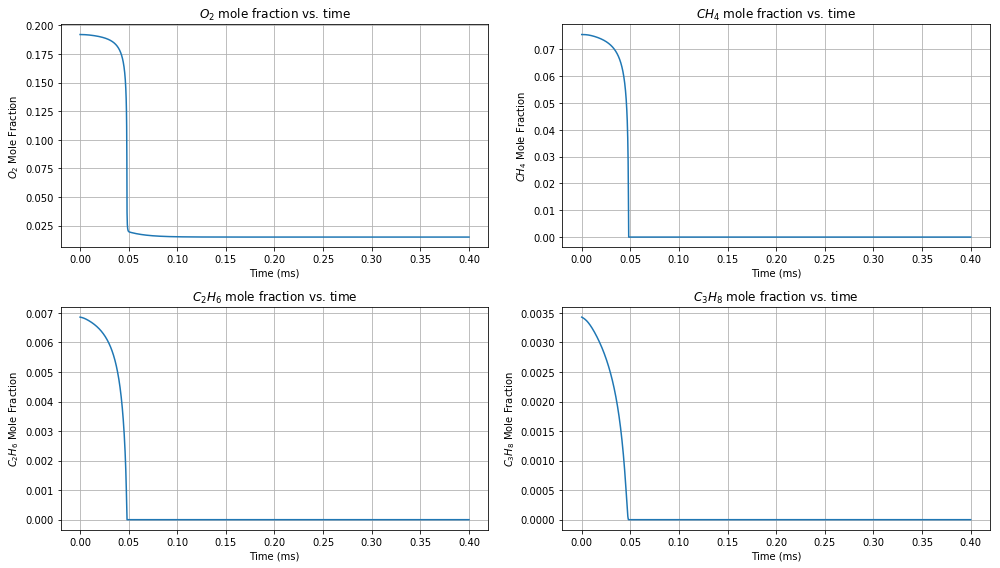

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

# Setup gas phase
gri3 = ct.Solution('gri30.cti') #GRI mechanism is used to analyze the gas 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) #Constant internal energy and volume reactor
sim = ct.ReactorNet([r])
time = 0.0  #initializing time
times = np.zeros(4000) #array to store calculates times
data = np.zeros((4000,8)) #array to store calculated concentrations/temperatureof reactor
for n in range(4000):
    time += 1e-7 #timestep 
    sim.advance(time) # Advances time to analyze the gas 
    times[n] = time * 1e3  # time in ms
    data[n,0] = r.T # Assigns calculated temperature values to the array  
    data[n,1:] = r.thermo['NO','NO2','CO','O2','CH4','C2H6','C3H8'].X #Assigns calculated concentration values to the array 
 
plt.clf()              #Plits the various curves of temperature/concentration of species vs. the time 
fig = plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(times, data[:,0])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs. time')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(times, data[:,1])
plt.xlabel('Time (ms)')
plt.ylabel('NO Mole Fraction')
plt.title('NO mole fraction vs. time')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(times, data[:,2])
plt.xlabel('Time (ms)')
plt.ylabel('$NO_2$ Mole Fraction')
plt.title('$NO_2$ mole fraction vs. time')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(times,data[:,3])
plt.xlabel('Time (ms)')
plt.ylabel('CO Mole Fraction')
plt.title('CO mole fraction vs. time')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()
fig = plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.plot(times,data[:,4])
plt.xlabel('Time (ms)')
plt.ylabel('$O_2$ Mole Fraction')
plt.title('$O_2$ mole fraction vs. time')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(times,data[:,5])
plt.xlabel('Time (ms)')
plt.ylabel('$CH_4$ Mole Fraction')
plt.title('$CH_4$ mole fraction vs. time')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(times,data[:,6])
plt.xlabel('Time (ms)')
plt.ylabel('$C_2H_6$ Mole Fraction')
plt.title('$C_2H_6$ mole fraction vs. time')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(times,data[:,7])
plt.xlabel('Time (ms)')
plt.ylabel('$C_3H_8$ Mole Fraction')
plt.title('$C_3H_8$ mole fraction vs. time')
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculation of the ignition time delays and the steady state times for various species

1) NO steady state time calculation

2) N02 steady state time calculation

3) O2 steady state time calculation 

4) CO steady state time calculation 

5) C2H6 steady state time calculation

6) CH4 steady state time calculation

7) C3H8 steadt state time calculation 

8) UV reactor ignition delay time calculation 

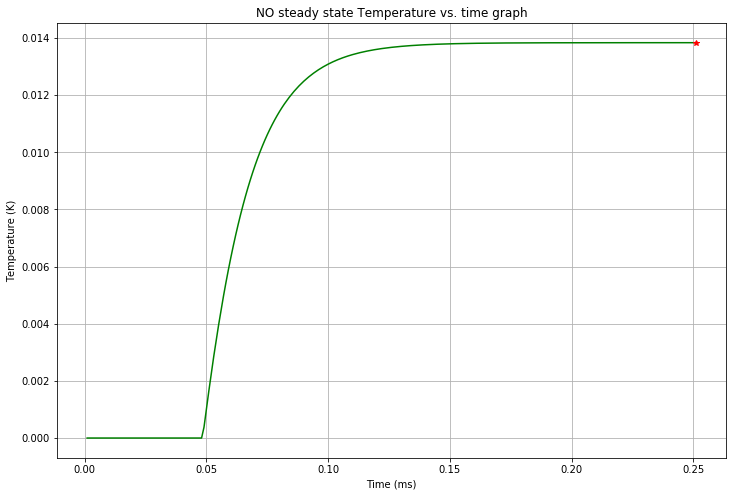

Time required to achieve steady state for NO = 0.25100 ms


In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['NO'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>250):
        if abs(x1-y1) < 1e-7:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.title('NO steady state Temperature vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for NO = %5.5f ms' %times[m]) 

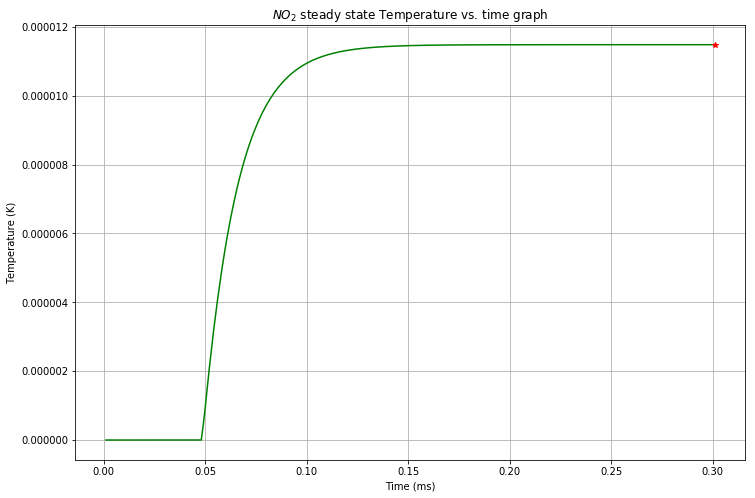

Time required to achieve steady state for NO2 = 0.30100 ms


In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['NO2'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>300):
        if abs(x1-y1) < 1e-10:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.title('$NO_2$ steady state Temperature vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for NO2 = %5.5f ms' %times[m]) 

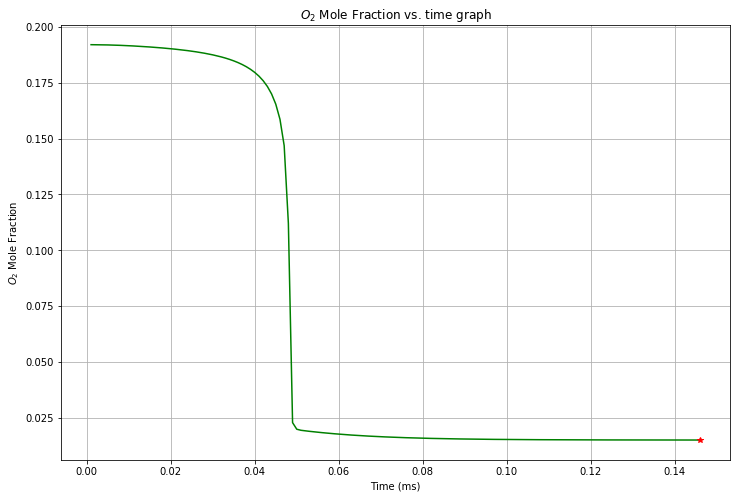

Time required to achieve steady state for O2 = 0.14600 ms


In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['O2'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>10):
        if abs(x1-y1) < 1e-6:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('$O_2$ Mole Fraction')
plt.title('$O_2$ Mole Fraction vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for O2 = %5.5f ms' %times[m])

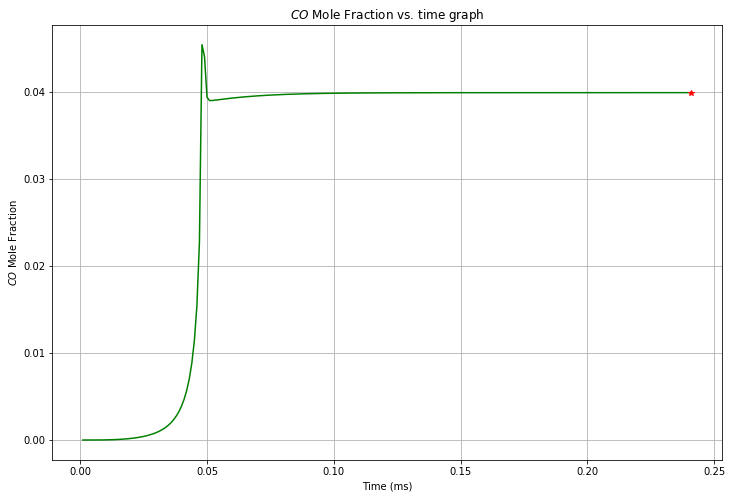

Time required to achieve steady state for CO = 0.24100 ms


In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(3500) # intializes the array to store time steps
data = np.zeros((3500,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['CO'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>240):
        if abs(x1-y1) < 1e-7:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('$CO$ Mole Fraction')
plt.title('$CO$ Mole Fraction vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for CO = %5.5f ms' %times[m])

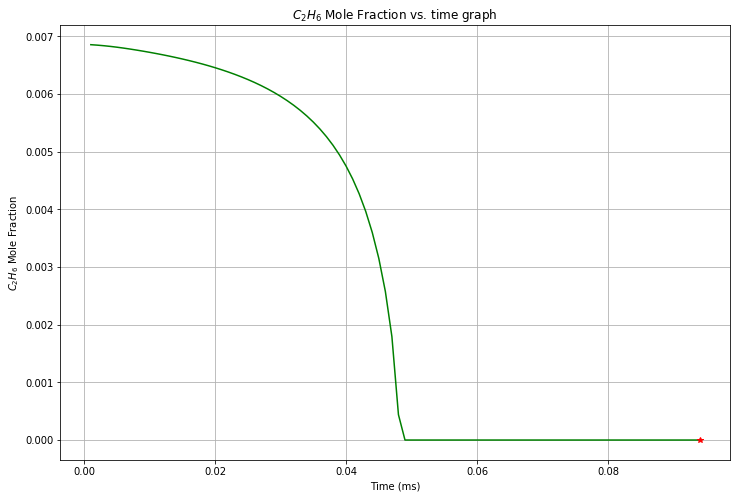

Time required to achieve steady state for C2H6 = 0.09400 ms


In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['C2H6'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>40):
        if abs(x1-y1) < 1e-27:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('$C_2H_6$ Mole Fraction')
plt.title('$C_2H_6$ Mole Fraction vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for C2H6 = %5.5f ms' %times[m])

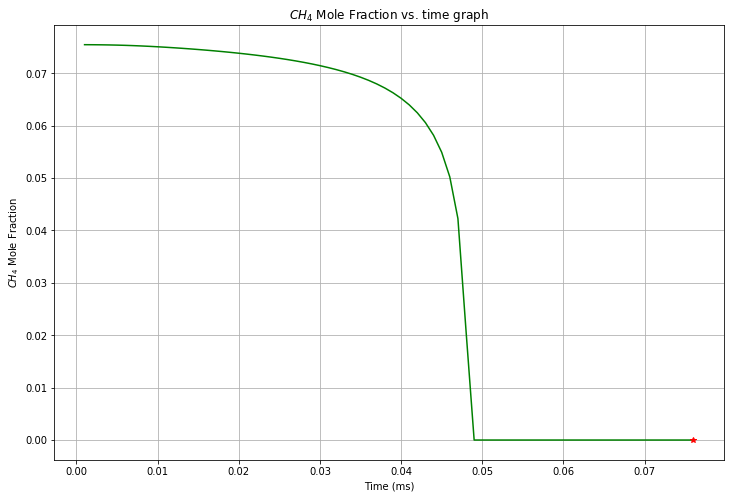

Time required to achieve steady state for CH4 = 0.07600 ms


In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['CH4'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>40):
        if abs(x1-y1) < 1e-15:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('$CH_4$ Mole Fraction')
plt.title('$CH_4$ Mole Fraction vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for CH4 = %5.5f ms' %times[m])

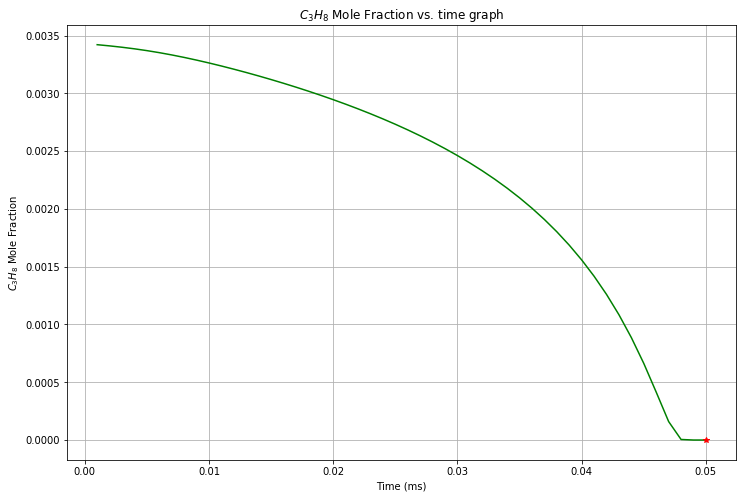

Time required to achieve steady state for C3H8 = 0.05000 ms


In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(10000):
    time += 1.0e-6   #time step
    sim.advance(time)  # advances time 
    times[n] = time * 1e3 # Assigns time 
    data[n,0] = r.thermo['C3H8'].X # Assigns concentration 
    x1 = data[n,0]
    if(n>40):
        if abs(x1-y1) < 1e-37:           # Condition to determine the steady state time with tolerance 
            break
    y1 = x1
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(12,8))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('$C_3H_8$ Mole Fraction')
plt.title('$C_3H_8$ Mole Fraction vs. time graph')
plt.grid(True)
plt.show()

print('Time required to achieve steady state for C3H8 = %5.5f ms' %times[m])

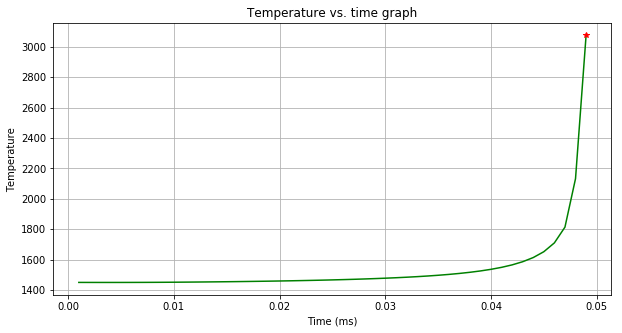

Ignition point occurs at time = 0.04900 ms


In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct

gri3 = ct.Solution('gri30.cti') # GRI Mechanism for analysis 
gri3.TPX = 1450, 15*ct.one_atm, 'CH4:0.88, C2H6:0.08, C3H8:0.04, O2:2.24, N2:8.4224' #initiliazing gas parameters
r = ct.IdealGasReactor(gri3) # COnstant volume and internal energy reactor 
sim = ct.ReactorNet([r])
time = 0.0 # initializes time
times = np.zeros(10000) # intializes the array to store time steps
data = np.zeros((10000,1)) # intializes the array to store concentration data
for n in range(100000):
    time += 1.0e-6  # time step 
    sim.advance(time) # Advances time to analyze data
    times[n] = time * 1e3   #stores time in ms
    data[n,0] = r.T # assigns calculate temperature values to the array 
    x = data[n,0] 
    if(n>1):                    # Condition that breaks when the ignition point is reached 
        z = data[n-2,0]
        if(x-y) < (y-z):
            break
    y = x
i=np.zeros((n,1))          # Stores the necessary values of concentration 
i_t=np.zeros((n,1))        # stores the times corresponding to these values 
for m in range(n):
    i[m] = data[m,0]
    i_t[m] = times[m]
    
fig = plt.figure(figsize=(10,5))    # Plot the curve to visually show this 
plt.plot(i_t, i,'g')
plt.plot(i_t[m], i[m], 'r*')     # Signifies the point at which the steady state occurs 
plt.xlabel('Time (ms)')
plt.ylabel('Temperature')
plt.title('Temperature vs. time graph')
plt.grid(True)
plt.show()

print('Ignition point occurs at time = %5.5f ms' %times[m])

## Table 

    
| Species                | $NO$    | $NO_2$  | $O_2$    | $CO$   | $C_2H_6$  | $CH_4$ | $C_3H_8$ |
|------------------------|---------|---------|---------|---------|---------|----------|----------|
| Steady State Time (ms) | 0.25100 | 0.30100 | 0.14600 | 0.24100 |0.09400 |  0.07600 | 0.05000  |

## Part 3 - 0D Reactor vs Chemical Equilibrium

The final part of this report compares the concentrations of various species at a residence time of 8ms when the initial pressure and temperature are 25atm and 1300K with different equilibrium composition of stoichiometric methane-air mixture 0.2-0.55 in steps of 0.05 respectively. The results obtained were compared with the quilibrium composition which is at steady state.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct
phi = np.linspace(0.2, 0.55, 8)  # Equivalence Ratios array
# Setup gas phase
gri3 = ct.Solution('gri30.cti') # GRI Mechanism is used to analyze this 
l=np.zeros(len(phi))   # Stores the values of ignition time delays
for i in range (len(phi)): 
    gri3.TPX = 1300, 25*ct.one_atm, 'CH4:%5.6f,O2:2,N2:7.52' %phi[i]   # Gas parameter initialization
    r = ct.IdealGasReactor(gri3) # Constant internal Energy and Volume Reactor 
    sim = ct.ReactorNet([r])
    time = 0.0 # intializing time
    times = np.zeros((100000,8)) # Array that stores the time iteration values 
    data = np.zeros((100000,8))  # Array that stores the concentration values 
    for n in range(100000):
        time += 1.0e-6  # time step 
        sim.advance(time) # Advances time to analyze data
        times[n,i] = time * 1e3 #time in ms
        data[n,i] = r.T # Array that assigns the temperature value
        x = data[n,i]
        if(n>1):      # Condition to determine ignition time delay
            z = data[n-2,i]
            if(x-y) < (y-z):
                break
        y = x
    l[i] = times[n-1,i] # stores values for the ignition times 
    print('The equivalence ratio is %5.2f and the ignition time is %5.6f ms' %(phi[i], times[n-1,i]))


The equivalence ratio is  0.20 and the ignition time is 0.408000 ms
The equivalence ratio is  0.25 and the ignition time is 0.400000 ms
The equivalence ratio is  0.30 and the ignition time is 0.399000 ms
The equivalence ratio is  0.35 and the ignition time is 0.402000 ms
The equivalence ratio is  0.40 and the ignition time is 0.407000 ms
The equivalence ratio is  0.45 and the ignition time is 0.414000 ms
The equivalence ratio is  0.50 and the ignition time is 0.422000 ms
The equivalence ratio is  0.55 and the ignition time is 0.430000 ms


In [12]:
m = np.zeros(len(phi)) # Stores the value of ignition times for the respective equivalence ratios
for i in range (len(phi)):
    m[i] = l[i] + 10            # adds the residence time to the ignition time delay 
gri3 = ct.Solution('gri30.cti')
j=0.00
store = np.zeros((8,8))
for j in range(len(phi)):
    gri3.TPX = 1300, 25*ct.one_atm, 'CH4:%5.6f,O2:2,N2:7.52' %phi[j]   # Gas parameters are initialized ere
    r = ct.IdealGasReactor(gri3)
    sim = ct.ReactorNet([r])
    time = 0.00e-6   # Time initialization
    times = np.zeros((100000,8)) # stores values of time 
    data = np.zeros((8,8)) # stores the temperature values at each iteration 
    for n in range(100000):
        time += 1.00e-6
        sim.advance(time)  # Advances time at each iteration to analyze gas
        times[n,j] = time * 1e3  # time in ms
        if m[j] - times[n,j] <0:
            #print(n)
            data[j,0] = r.T 
            #print(data[j,0])
            data[j,1:] = r.thermo['NO','NO2','CO','CH4','CO2','O2','H2O'].X
            #print(data[j,1:])
            for k in range(len(phi)):
                store[j,k] = data[j,k]
            break

T_ad = 1874.835881 and equivalence ratio = 0.20
T_ad = 2002.211288 and equivalence ratio = 0.25
T_ad = 2124.115834 and equivalence ratio = 0.30
T_ad = 2240.911103 and equivalence ratio = 0.35
T_ad = 2352.738058 and equivalence ratio = 0.40
T_ad = 2459.477302 and equivalence ratio = 0.45
T_ad = 2560.742826 and equivalence ratio = 0.50
T_ad = 2655.934348 and equivalence ratio = 0.55


<Figure size 432x288 with 0 Axes>

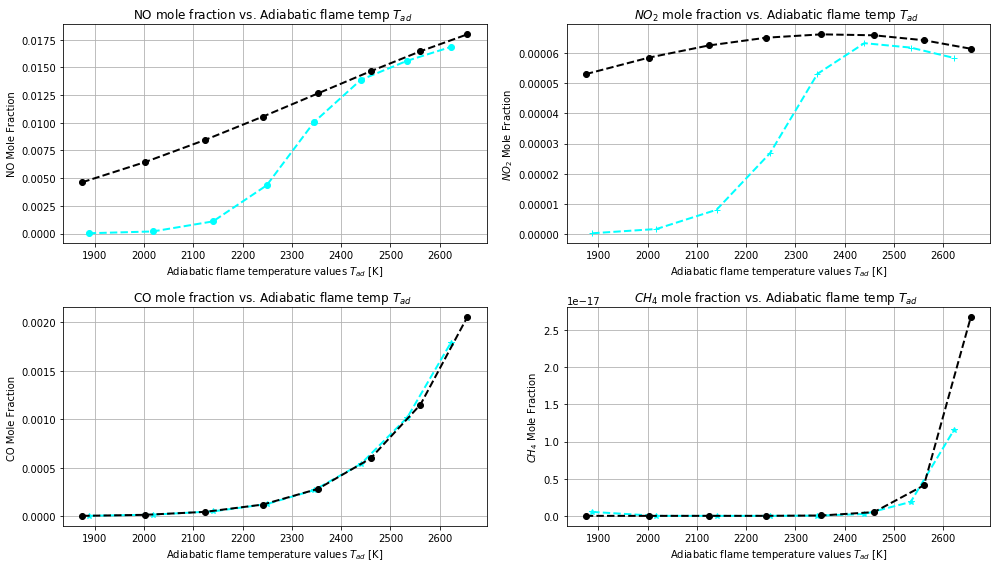

<Figure size 432x288 with 0 Axes>

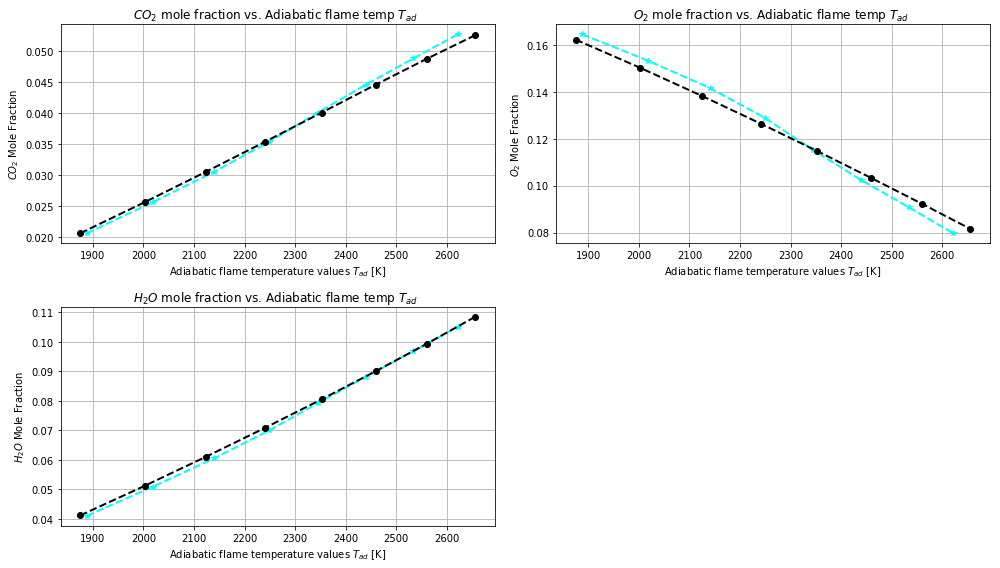

In [14]:
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}
incomplete_species = [species[S] for S in ('CH4','O2','CO2','H2O','CO','H2','N2','NO', 'NO2')]
gas2 = ct.Solution(thermo='IdealGas', species=incomplete_species)
phi = np.linspace(0.2, 0.55, 8)        # Equivalence Ratio values of interest
T_incomplete = np.zeros(phi.shape)  # Equilibrium composition counters
eqsolNO=np.zeros(phi.shape)
eqsolNO2=np.zeros(phi.shape)
eqsolCO=np.zeros(phi.shape)
eqsolCH4=np.zeros(phi.shape)
eqsolCO2=np.zeros(phi.shape)
eqsolO2=np.zeros(phi.shape)
eqsolH2O=np.zeros(phi.shape)

for i in range(len(phi)):
    gas2.TPX = 1300, 25*ct.one_atm,'CH4:%5.6f, O2:2, N2:7.52' %phi[i]   # Evaluating the gas at different values of Eq. ratios
    gas2.equilibrate('UV')       # We assume Adiabatic constant pressure process 
    T_incomplete[i] = gas2.T     # Storing T_ad values
    print('T_ad = %5.6f and equivalence ratio = %1.2f' %(gas2.T, phi[i])) # Printing T_ad to study the trend 
    eqsolNO[i]=gas2['NO'].X
    eqsolNO2[i]=gas2['NO2'].X
    eqsolCO[i]=gas2['CO'].X
    eqsolCH4[i]=gas2['CH4'].X
    eqsolCO2[i]=gas2['CO2'].X
    eqsolO2[i]=gas2['O2'].X
    eqsolH2O[i]=gas2['H2O'].X

plt.clf()
fig = plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.plot(store[:,0], store[:,1], color="cyan", lw = 2, ls='--', marker='o', label="NO 0-D approach")
plt.plot(T_incomplete, eqsolNO, color="black", lw = 2, ls='--', marker='o', label="NO Eq. approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('NO Mole Fraction')
plt.title('NO mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(store[:,0], store[:,2], color="cyan", lw=2, ls='--', marker='+', label="NO2 0-D approach")
plt.plot(T_incomplete, eqsolNO2, color="black", lw = 2, ls='--', marker='o', label="NO2 Eq. approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('$NO_2$ Mole Fraction')
plt.title('$NO_2$ mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(store[:,0], store[:,3], color="cyan", lw=2, ls='--', marker='*', label="CO 0-D approach")
plt.plot(T_incomplete, eqsolCO, color="black", lw = 2, ls='--', marker='o', label="CO Eq. approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('CO Mole Fraction ')
plt.title('CO mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(store[:,0], store[:,4], color="cyan", lw=2, ls='--', marker='*', label="CH4 0-D approach")
plt.plot(T_incomplete, eqsolCH4, color="black", lw = 2, ls='--', marker='o', label="CH4 Eq.approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('$CH_4$ Mole Fraction')
plt.title('$CH_4$ mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()
fig = plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.plot(store[:,0], store[:,5], color="cyan", lw=2, ls='--', marker='*', label="CO2 0-D approach")
plt.plot(T_incomplete, eqsolCO2, color="black", lw = 2, ls='--', marker='o', label="CO2 Eq. approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('$CO_2$ Mole Fraction')
plt.title('$CO_2$ mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(store[:,0], store[:,6], color="cyan", lw=2, ls='--', marker='*', label="O2 0-D approach")
plt.plot(T_incomplete, eqsolO2, color="black", lw = 2, ls='--', marker='o', label="O2 Eq. approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('$O_2$ Mole Fraction')
plt.title('$O_2$ mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(store[:,0], store[:,7], color="cyan", lw=2, ls='--', marker='*', label="H2O 0-D approach")
plt.plot(T_incomplete, eqsolH2O, color="black", lw = 2, ls='--', marker='o', label="H2O Eq. approach")
plt.xlabel('Adiabatic flame temperature values $T_{ad}$ [K]')
plt.ylabel('$H_2O$ Mole Fraction')
plt.title('$H_2O$ mole fraction vs. Adiabatic flame temp $T_{ad}$  ')
plt.grid(True)
plt.tight_layout()
plt.show()


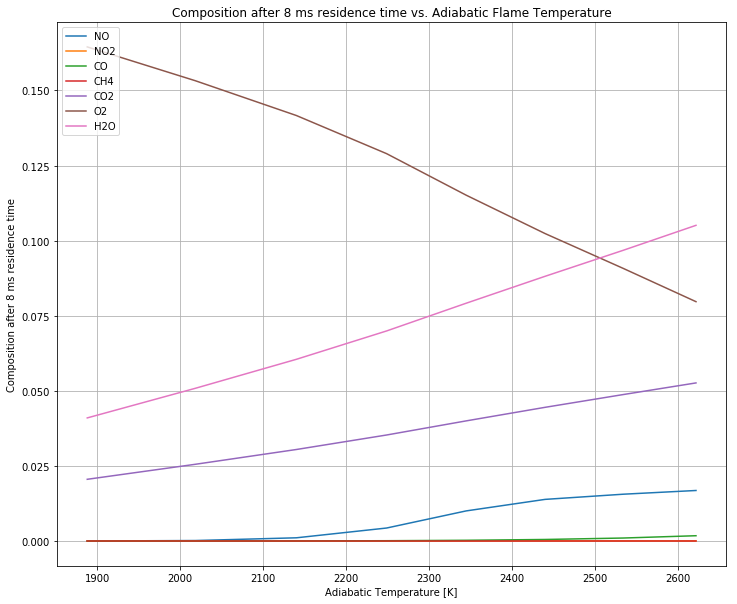

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10))     # Plotting Graph for the Adiabtic temperature vs Eq. ratio
axes.plot(store[:,0], store[:,1], label="NO")            # Plotting Graph for the Equilibrium concentration vs. Eq. Ratio
axes.plot(store[:,0], store[:,2], label="NO2")
axes.plot(store[:,0], store[:,3], label="CO")
axes.plot(store[:,0], store[:,4], label="CH4")
axes.plot(store[:,0], store[:,5], label="CO2")
axes.plot(store[:,0], store[:,6], label="O2")
axes.plot(store[:,0], store[:,7], label="H2O")
axes.grid(True)
axes.legend(loc=2); # upper left corner
axes.set_xlabel('Adiabatic Temperature [K]')
axes.set_ylabel('Composition after 8 ms residence time')
axes.set_title('Composition after 8 ms residence time vs. Adiabatic Flame Temperature');
plt.show()

T_ad = 1874.835881 and equivalence ratio = 0.20
T_ad = 2002.211288 and equivalence ratio = 0.25
T_ad = 2124.115834 and equivalence ratio = 0.30
T_ad = 2240.911103 and equivalence ratio = 0.35
T_ad = 2352.738058 and equivalence ratio = 0.40
T_ad = 2459.477302 and equivalence ratio = 0.45
T_ad = 2560.742826 and equivalence ratio = 0.50
T_ad = 2655.934348 and equivalence ratio = 0.55


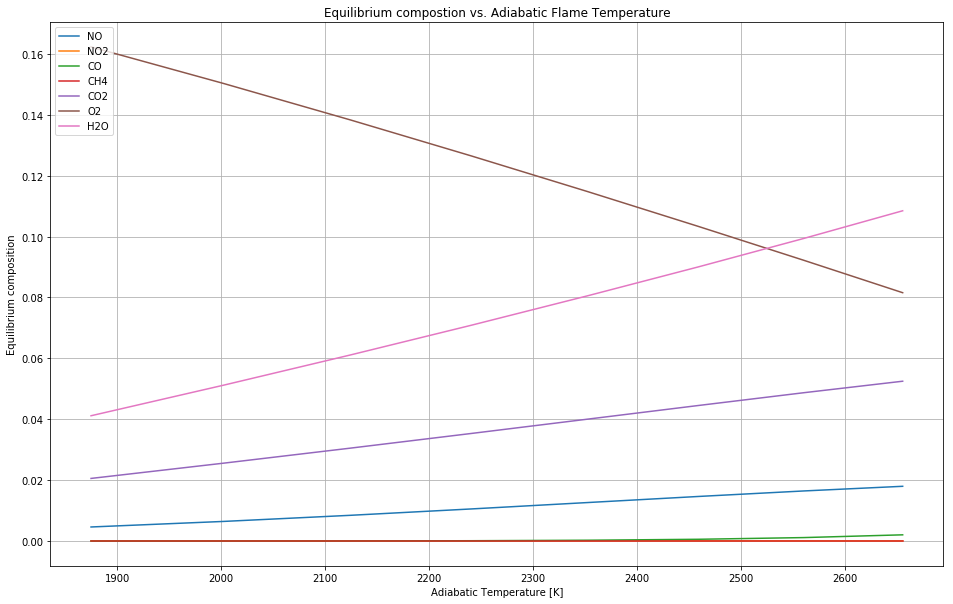

In [154]:

%matplotlib inline
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}
incomplete_species = [species[S] for S in ('CH4','O2','CO2','H2O','CO','H2','N2','NO', 'NO2')]
gas2 = ct.Solution(thermo='IdealGas', species=incomplete_species)
phi = np.linspace(0.2, 0.55, 8)        # Equivalence Ratio values of interest
T_incomplete = np.zeros(phi.shape)  # Equilibrium composition counters
eqsolNO=np.zeros(phi.shape)
eqsolNO2=np.zeros(phi.shape)
eqsolCO=np.zeros(phi.shape)
eqsolCH4=np.zeros(phi.shape)
eqsolCO2=np.zeros(phi.shape)
eqsolO2=np.zeros(phi.shape)
eqsolH2O=np.zeros(phi.shape)

for i in range(len(phi)):
    gas2.TPX = 1300, 25*ct.one_atm,'CH4:%5.6f, O2:2, N2:7.52' %phi[i]   # Evaluating the gas at different values of Eq. ratios
    gas2.equilibrate('UV')       # We assume Adiabatic constant pressure process 
    T_incomplete[i] = gas2.T     # Storing T_ad values
    print('T_ad = %5.6f and equivalence ratio = %1.2f' %(gas2.T, phi[i])) # Printing T_ad to study the trend 
    eqsolNO[i]=gas2['NO'].X
    eqsolNO2[i]=gas2['NO2'].X
    eqsolCO[i]=gas2['CO'].X
    eqsolCH4[i]=gas2['CH4'].X
    eqsolCO2[i]=gas2['CO2'].X
    eqsolO2[i]=gas2['O2'].X
    eqsolH2O[i]=gas2['H2O'].X

fig, axes = plt.subplots(1, 1, figsize=(16, 10))     # Plotting Graph for the Adiabtic temperature vs Eq. ratio
axes.plot(T_incomplete, eqsolNO, label="NO")            # Plotting Graph for the Equilibrium concentration vs. Eq. Ratio
axes.plot(T_incomplete, eqsolNO2, label="NO2")
axes.plot(T_incomplete, eqsolCO, label="CO")
axes.plot(T_incomplete, eqsolCH4, label="CH4")
axes.plot(T_incomplete, eqsolCO2, label="CO2")
axes.plot(T_incomplete, eqsolO2, label="O2")
axes.plot(T_incomplete, eqsolH2O, label="H2O")
axes.grid(True)
axes.legend(loc=2); # upper left corner
axes.set_xlabel('Adiabatic Temperature [K]')
axes.set_ylabel('Equilibrium composition')
axes.set_title('Equilibrium compostion vs. Adiabatic Flame Temperature');

## Conclusion

The objective of this project was to improve our understanding about Ignition delay time. Different definitions and methods of determining ignition delay time was explored. And it was established that choosing the time at which the temporal temperature gradient (dT/dt) is maximum is an ideal approximation for ignition delay time. Furthermore, different conditions were varied to study their effect on ignition delay time and on the activation energy.Additionally, the fuel consumption and pollutant generation in Constant UV Reactor was also investigated. This showed us how the mole fraction of different species changed during the course of the combustion process. It was seen that pollutants such as CO was one of the first products to form and reach steady state while pollutants such as NOx were produced only when the temperature exceeded temperatures of approximately 2600K and were one of the last species to reach steady state.